In [1]:
import sys
import multiprocessing
sys.path.insert(1, '/home/peps/Documents/tesis_codigo')

In [2]:
import pickle
from gensim.models import AuthorTopicModel
from gensim.models import LdaModel

In [3]:
with open("pickles/preprocesamiento.pickle", "rb") as f:
    corpus, dictionary, author2doc = pickle.load(f) 

In [4]:
print('# de autores: %d' % len(author2doc))
print('# tokens unicos: %d' % len(dictionary))
print('# de documentos: %d' % len(corpus))

# de autores: 114
# tokens unicos: 19900
# de documentos: 41340


# Escogiendo el número de topicos e hiperparametros

## Hiperparametros

In [10]:
from ray import tune
from ray.tune import track
from ray.tune.schedulers import ASHAScheduler
import numpy as np

In [11]:
search_space = {
    "num_topics": 100,
    "passes": tune.sample_from(lambda spec: np.random.randint(1,10)),
    "iterations": tune.sample_from(lambda spec: np.random.randint(50,10000)),
    "gamma_threshold": tune.uniform(1e-11, 0.001)    
}

In [70]:
def search_best_AuthorTopicModel(config):
    model = AuthorTopicModel(
        corpus=corpus, 
        num_topics=config["num_topics"],
        id2word=dictionary.id2token,
        author2doc=author2doc, 
        chunksize=2000, 
        passes=config["passes"], 
        eval_every=0, 
        iterations=config["iterations"],
        gamma_threshold=config["gamma_threshold"]
    )
    top_topics = model.top_topics(corpus)
    tc = sum([t[1] for t in top_topics])
    track.log(topic_coherence=tc)

In [15]:
reporter = tune.JupyterNotebookReporter(True, max_progress_rows=20, max_error_rows=20, max_report_frequency=5)

In [13]:
# analysis = tune.run(search_best_AuthorTopicModel, config=search_space, num_samples=100, progress_reporter=reporter)

2020-06-11 02:41:07,142	WARNING tune.py:316 -- Tune detects GPUs, but no trials are using GPUs. To enable trials to use GPUs, set tune.run(resources_per_trial={'gpu': 1}...) which allows Tune to expose 1 GPU to each trial. You can also override `Trainable.default_resource_request` if using the Trainable API.


Trial name,status,loc,gamma_threshold,iterations,passes
search_best_AuthorTopicModel_00001,PENDING,,0.000222572,8995,5
search_best_AuthorTopicModel_00002,PENDING,,0.0008039,9043,7
search_best_AuthorTopicModel_00003,PENDING,,0.000506057,560,6
search_best_AuthorTopicModel_00004,PENDING,,0.000173919,3127,1
search_best_AuthorTopicModel_00005,PENDING,,0.0009349,3920,5
search_best_AuthorTopicModel_00006,PENDING,,0.000741075,9629,4
search_best_AuthorTopicModel_00007,PENDING,,0.000821481,5627,3
search_best_AuthorTopicModel_00008,PENDING,,0.000400395,5017,2
search_best_AuthorTopicModel_00009,PENDING,,0.000760156,479,3
search_best_AuthorTopicModel_00010,PENDING,,0.00098303,9043,3


(pid=33032) 2020-06-11 02:41:17,428	INFO trainable.py:217 -- Getting current IP.
(pid=33027) 2020-06-11 02:41:17,673	INFO trainable.py:217 -- Getting current IP.
(pid=33031) 2020-06-11 02:41:18,001	INFO trainable.py:217 -- Getting current IP.
(pid=33030) 2020-06-11 02:41:18,386	INFO trainable.py:217 -- Getting current IP.
(pid=33028) 2020-06-11 02:41:18,930	INFO trainable.py:217 -- Getting current IP.
(pid=33033) 2020-06-11 02:41:19,342	INFO trainable.py:217 -- Getting current IP.
(pid=33034) 2020-06-11 02:41:19,755	INFO trainable.py:217 -- Getting current IP.
(pid=33029) 2020-06-11 02:41:20,228	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00004:
  date: 2020-06-11_02-42-44
  done: false
  experiment_id: 32afa29df8114c448e63b1c3e09fea60
  experiment_tag: 4_gamma_threshold=0.00017392,iterations=3127,passes=1
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 33028
  time_since_restore: 85.66300225257874
  time_this

Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00008,PENDING,,0.000400395,5017,2,,
search_best_AuthorTopicModel_00009,PENDING,,0.000760156,479,3,,
search_best_AuthorTopicModel_00010,PENDING,,0.00098303,9043,3,,
search_best_AuthorTopicModel_00011,PENDING,,0.000208206,1000,6,,
search_best_AuthorTopicModel_00012,PENDING,,0.00096152,5379,9,,
search_best_AuthorTopicModel_00013,PENDING,,9.43367e-05,6227,2,,
search_best_AuthorTopicModel_00014,PENDING,,0.000345729,4695,5,,
search_best_AuthorTopicModel_00015,PENDING,,0.000379429,3923,7,,
search_best_AuthorTopicModel_00016,PENDING,,0.000886433,3540,6,,
search_best_AuthorTopicModel_00017,PENDING,,0.000111674,2481,6,,


2020-06-11 02:42:45,319	WARNING util.py:134 -- The `start_trial` operation took 0.6514112949371338 seconds to complete, which may be a performance bottleneck.


(pid=33221) 2020-06-11 02:42:46,998	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00007:
  date: 2020-06-11_02-43-44
  done: false
  experiment_id: 662c5bf1bcaf4f3ab811b1a5498bd3c4
  experiment_tag: 7_gamma_threshold=0.00082148,iterations=5627,passes=3
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 33029
  time_since_restore: 144.70538878440857
  time_this_iter_s: 144.70538878440857
  time_total_s: 144.70538878440857
  timestamp: 1591861424
  timesteps_since_restore: 0
  topic_coherence: -1709.3855898328102
  training_iteration: 0
  trial_id: '00007'
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00009,PENDING,,0.000760156,479,3,,
search_best_AuthorTopicModel_00010,PENDING,,0.00098303,9043,3,,
search_best_AuthorTopicModel_00011,PENDING,,0.000208206,1000,6,,
search_best_AuthorTopicModel_00012,PENDING,,0.00096152,5379,9,,
search_best_AuthorTopicModel_00013,PENDING,,9.43367e-05,6227,2,,
search_best_AuthorTopicModel_00014,PENDING,,0.000345729,4695,5,,
search_best_AuthorTopicModel_00015,PENDING,,0.000379429,3923,7,,
search_best_AuthorTopicModel_00016,PENDING,,0.000886433,3540,6,,
search_best_AuthorTopicModel_00017,PENDING,,0.000111674,2481,6,,
search_best_AuthorTopicModel_00018,PENDING,,8.91374e-05,9717,8,,


2020-06-11 02:43:45,762	WARNING util.py:134 -- The `start_trial` operation took 0.7131378650665283 seconds to complete, which may be a performance bottleneck.


(pid=33239) 2020-06-11 02:43:47,518	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00000:
  date: 2020-06-11_02-44-12
  done: false
  experiment_id: f3dde96ee4714b849561b31c7fcd047f
  experiment_tag: 0_gamma_threshold=0.00042718,iterations=8566,passes=4
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 33032
  time_since_restore: 175.05810642242432
  time_this_iter_s: 175.05810642242432
  time_total_s: 175.05810642242432
  timestamp: 1591861452
  timesteps_since_restore: 0
  topic_coherence: -1713.5795459100298
  training_iteration: 0
  trial_id: '00000'
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00010,PENDING,,0.00098303,9043,3,,
search_best_AuthorTopicModel_00011,PENDING,,0.000208206,1000,6,,
search_best_AuthorTopicModel_00012,PENDING,,0.00096152,5379,9,,
search_best_AuthorTopicModel_00013,PENDING,,9.43367e-05,6227,2,,
search_best_AuthorTopicModel_00014,PENDING,,0.000345729,4695,5,,
search_best_AuthorTopicModel_00015,PENDING,,0.000379429,3923,7,,
search_best_AuthorTopicModel_00016,PENDING,,0.000886433,3540,6,,
search_best_AuthorTopicModel_00017,PENDING,,0.000111674,2481,6,,
search_best_AuthorTopicModel_00018,PENDING,,8.91374e-05,9717,8,,
search_best_AuthorTopicModel_00019,PENDING,,0.000693777,1059,6,,


2020-06-11 02:44:13,155	WARNING util.py:134 -- The `start_trial` operation took 0.619365930557251 seconds to complete, which may be a performance bottleneck.


(pid=33256) 2020-06-11 02:44:15,026	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00006:
  date: 2020-06-11_02-44-22
  done: false
  experiment_id: 2ccfe4d94a89453f8c16af8029580aeb
  experiment_tag: 6_gamma_threshold=0.00074107,iterations=9629,passes=4
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 33034
  time_since_restore: 183.20811200141907
  time_this_iter_s: 183.20811200141907
  time_total_s: 183.20811200141907
  timestamp: 1591861462
  timesteps_since_restore: 0
  topic_coherence: -1716.5714721029651
  training_iteration: 0
  trial_id: '00006'
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00011,PENDING,,0.000208206,1000,6,,
search_best_AuthorTopicModel_00012,PENDING,,0.00096152,5379,9,,
search_best_AuthorTopicModel_00013,PENDING,,9.43367e-05,6227,2,,
search_best_AuthorTopicModel_00014,PENDING,,0.000345729,4695,5,,
search_best_AuthorTopicModel_00015,PENDING,,0.000379429,3923,7,,
search_best_AuthorTopicModel_00016,PENDING,,0.000886433,3540,6,,
search_best_AuthorTopicModel_00017,PENDING,,0.000111674,2481,6,,
search_best_AuthorTopicModel_00018,PENDING,,8.91374e-05,9717,8,,
search_best_AuthorTopicModel_00019,PENDING,,0.000693777,1059,6,,
search_best_AuthorTopicModel_00001,RUNNING,,0.000222572,8995,5,,


2020-06-11 02:44:23,648	WARNING util.py:134 -- The `start_trial` operation took 0.6097071170806885 seconds to complete, which may be a performance bottleneck.


(pid=33270) 2020-06-11 02:44:25,301	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00005:
  date: 2020-06-11_02-44-42
  done: false
  experiment_id: 6adece057704408e9f44dc1f460687af
  experiment_tag: 5_gamma_threshold=0.0009349,iterations=3920,passes=5
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 33033
  time_since_restore: 203.2107071876526
  time_this_iter_s: 203.2107071876526
  time_total_s: 203.2107071876526
  timestamp: 1591861482
  timesteps_since_restore: 0
  topic_coherence: -1715.1076999938737
  training_iteration: 0
  trial_id: '00005'
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00012,PENDING,,0.00096152,5379,9,,
search_best_AuthorTopicModel_00013,PENDING,,9.43367e-05,6227,2,,
search_best_AuthorTopicModel_00014,PENDING,,0.000345729,4695,5,,
search_best_AuthorTopicModel_00015,PENDING,,0.000379429,3923,7,,
search_best_AuthorTopicModel_00016,PENDING,,0.000886433,3540,6,,
search_best_AuthorTopicModel_00017,PENDING,,0.000111674,2481,6,,
search_best_AuthorTopicModel_00018,PENDING,,8.91374e-05,9717,8,,
search_best_AuthorTopicModel_00019,PENDING,,0.000693777,1059,6,,
search_best_AuthorTopicModel_00001,RUNNING,,0.000222572,8995,5,,
search_best_AuthorTopicModel_00002,RUNNING,,0.0008039,9043,7,,


2020-06-11 02:44:43,364	WARNING util.py:134 -- The `start_trial` operation took 0.7419428825378418 seconds to complete, which may be a performance bottleneck.


(pid=33284) 2020-06-11 02:44:45,073	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00008:
  date: 2020-06-11_02-44-47
  done: false
  experiment_id: 0a10f34e36114d22b8ad495917126070
  experiment_tag: 8_gamma_threshold=0.00040039,iterations=5017,passes=2
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 33221
  time_since_restore: 120.9783821105957
  time_this_iter_s: 120.9783821105957
  time_total_s: 120.9783821105957
  timestamp: 1591861487
  timesteps_since_restore: 0
  topic_coherence: -1716.9295222461458
  training_iteration: 0
  trial_id: 00008
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00013,PENDING,,9.43367e-05,6227,2,,
search_best_AuthorTopicModel_00014,PENDING,,0.000345729,4695,5,,
search_best_AuthorTopicModel_00015,PENDING,,0.000379429,3923,7,,
search_best_AuthorTopicModel_00016,PENDING,,0.000886433,3540,6,,
search_best_AuthorTopicModel_00017,PENDING,,0.000111674,2481,6,,
search_best_AuthorTopicModel_00018,PENDING,,8.91374e-05,9717,8,,
search_best_AuthorTopicModel_00019,PENDING,,0.000693777,1059,6,,
search_best_AuthorTopicModel_00020,PENDING,,0.000524246,6261,9,,
search_best_AuthorTopicModel_00001,RUNNING,,0.000222572,8995,5,,
search_best_AuthorTopicModel_00002,RUNNING,,0.0008039,9043,7,,


2020-06-11 02:44:48,517	WARNING util.py:134 -- The `start_trial` operation took 0.5055747032165527 seconds to complete, which may be a performance bottleneck.


(pid=33298) 2020-06-11 02:44:50,097	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00001:
  date: 2020-06-11_02-44-58
  done: false
  experiment_id: 3dd36ab5e66c4ba68f4b8ba02a874d90
  experiment_tag: 1_gamma_threshold=0.00022257,iterations=8995,passes=5
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 33027
  time_since_restore: 220.6003658771515
  time_this_iter_s: 220.6003658771515
  time_total_s: 220.6003658771515
  timestamp: 1591861498
  timesteps_since_restore: 0
  topic_coherence: -1713.4578212753083
  training_iteration: 0
  trial_id: '00001'
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00014,PENDING,,0.000345729,4695,5,,
search_best_AuthorTopicModel_00015,PENDING,,0.000379429,3923,7,,
search_best_AuthorTopicModel_00016,PENDING,,0.000886433,3540,6,,
search_best_AuthorTopicModel_00017,PENDING,,0.000111674,2481,6,,
search_best_AuthorTopicModel_00018,PENDING,,8.91374e-05,9717,8,,
search_best_AuthorTopicModel_00019,PENDING,,0.000693777,1059,6,,
search_best_AuthorTopicModel_00020,PENDING,,0.000524246,6261,9,,
search_best_AuthorTopicModel_00001,RUNNING,192.168.50.37:33027,0.000222572,8995,5,0,220.6
search_best_AuthorTopicModel_00002,RUNNING,,0.0008039,9043,7,,
search_best_AuthorTopicModel_00003,RUNNING,,0.000506057,560,6,,


2020-06-11 02:44:58,941	WARNING util.py:134 -- The `start_trial` operation took 0.6053838729858398 seconds to complete, which may be a performance bottleneck.


(pid=33312) 2020-06-11 02:45:00,571	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00003:
  date: 2020-06-11_02-45-21
  done: false
  experiment_id: 47a534de61ca40d99b8386eeff36b378
  experiment_tag: 3_gamma_threshold=0.00050606,iterations=560,passes=6
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 33030
  time_since_restore: 242.86493134498596
  time_this_iter_s: 242.86493134498596
  time_total_s: 242.86493134498596
  timestamp: 1591861521
  timesteps_since_restore: 0
  topic_coherence: -1720.7397404184815
  training_iteration: 0
  trial_id: '00003'
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00015,PENDING,,0.000379429,3923,7,,
search_best_AuthorTopicModel_00016,PENDING,,0.000886433,3540,6,,
search_best_AuthorTopicModel_00017,PENDING,,0.000111674,2481,6,,
search_best_AuthorTopicModel_00018,PENDING,,8.91374e-05,9717,8,,
search_best_AuthorTopicModel_00019,PENDING,,0.000693777,1059,6,,
search_best_AuthorTopicModel_00020,PENDING,,0.000524246,6261,9,,
search_best_AuthorTopicModel_00021,PENDING,,0.000663803,7630,3,,
search_best_AuthorTopicModel_00002,RUNNING,,0.0008039,9043,7,,
search_best_AuthorTopicModel_00003,RUNNING,192.168.50.37:33030,0.000506057,560,6,0,242.865
search_best_AuthorTopicModel_00009,RUNNING,,0.000760156,479,3,,


2020-06-11 02:45:21,984	WARNING util.py:134 -- The `start_trial` operation took 0.6431698799133301 seconds to complete, which may be a performance bottleneck.


(pid=33329) 2020-06-11 02:45:23,557	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00002:
  date: 2020-06-11_02-45-32
  done: false
  experiment_id: f6069ebee246443ca975d5426299ddcf
  experiment_tag: 2_gamma_threshold=0.0008039,iterations=9043,passes=7
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 33031
  time_since_restore: 254.29331016540527
  time_this_iter_s: 254.29331016540527
  time_total_s: 254.29331016540527
  timestamp: 1591861532
  timesteps_since_restore: 0
  topic_coherence: -1725.638599862487
  training_iteration: 0
  trial_id: '00002'
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00016,PENDING,,0.000886433,3540,6,,
search_best_AuthorTopicModel_00017,PENDING,,0.000111674,2481,6,,
search_best_AuthorTopicModel_00018,PENDING,,8.91374e-05,9717,8,,
search_best_AuthorTopicModel_00019,PENDING,,0.000693777,1059,6,,
search_best_AuthorTopicModel_00020,PENDING,,0.000524246,6261,9,,
search_best_AuthorTopicModel_00021,PENDING,,0.000663803,7630,3,,
search_best_AuthorTopicModel_00022,PENDING,,0.000743126,6592,9,,
search_best_AuthorTopicModel_00002,RUNNING,192.168.50.37:33031,0.0008039,9043,7,0,254.293
search_best_AuthorTopicModel_00009,RUNNING,,0.000760156,479,3,,
search_best_AuthorTopicModel_00010,RUNNING,,0.00098303,9043,3,,


2020-06-11 02:45:32,924	WARNING util.py:134 -- The `start_trial` operation took 0.5723905563354492 seconds to complete, which may be a performance bottleneck.


(pid=33343) 2020-06-11 02:45:34,495	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00009:
  date: 2020-06-11_02-46-00
  done: false
  experiment_id: f7a9b26e1b584f2da8fb8b9e5507d8aa
  experiment_tag: 9_gamma_threshold=0.00076016,iterations=479,passes=3
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 33239
  time_since_restore: 132.949524641037
  time_this_iter_s: 132.949524641037
  time_total_s: 132.949524641037
  timestamp: 1591861560
  timesteps_since_restore: 0
  topic_coherence: -1700.9004607103257
  training_iteration: 0
  trial_id: 00009
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00017,PENDING,,0.000111674,2481,6,,
search_best_AuthorTopicModel_00018,PENDING,,8.91374e-05,9717,8,,
search_best_AuthorTopicModel_00019,PENDING,,0.000693777,1059,6,,
search_best_AuthorTopicModel_00020,PENDING,,0.000524246,6261,9,,
search_best_AuthorTopicModel_00021,PENDING,,0.000663803,7630,3,,
search_best_AuthorTopicModel_00022,PENDING,,0.000743126,6592,9,,
search_best_AuthorTopicModel_00023,PENDING,,5.63664e-05,2417,1,,
search_best_AuthorTopicModel_00009,RUNNING,192.168.50.37:33239,0.000760156,479,3,0,132.95
search_best_AuthorTopicModel_00010,RUNNING,,0.00098303,9043,3,,
search_best_AuthorTopicModel_00011,RUNNING,,0.000208206,1000,6,,


2020-06-11 02:46:01,073	WARNING util.py:134 -- The `start_trial` operation took 0.5161550045013428 seconds to complete, which may be a performance bottleneck.


(pid=33357) 2020-06-11 02:46:02,736	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00010:
  date: 2020-06-11_02-46-26
  done: false
  experiment_id: 3dc441c8fdeb4edf9bba4a49d6127d50
  experiment_tag: 10_gamma_threshold=0.00098303,iterations=9043,passes=3
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 33256
  time_since_restore: 131.17836594581604
  time_this_iter_s: 131.17836594581604
  time_total_s: 131.17836594581604
  timestamp: 1591861586
  timesteps_since_restore: 0
  topic_coherence: -1710.8740711427724
  training_iteration: 0
  trial_id: '00010'
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00018,PENDING,,8.91374e-05,9717,8,,
search_best_AuthorTopicModel_00019,PENDING,,0.000693777,1059,6,,
search_best_AuthorTopicModel_00020,PENDING,,0.000524246,6261,9,,
search_best_AuthorTopicModel_00021,PENDING,,0.000663803,7630,3,,
search_best_AuthorTopicModel_00022,PENDING,,0.000743126,6592,9,,
search_best_AuthorTopicModel_00023,PENDING,,5.63664e-05,2417,1,,
search_best_AuthorTopicModel_00024,PENDING,,0.000240019,6442,2,,
search_best_AuthorTopicModel_00010,RUNNING,192.168.50.37:33256,0.00098303,9043,3,0,131.178
search_best_AuthorTopicModel_00011,RUNNING,,0.000208206,1000,6,,
search_best_AuthorTopicModel_00012,RUNNING,,0.00096152,5379,9,,


2020-06-11 02:46:26,989	WARNING util.py:134 -- The `start_trial` operation took 0.7286851406097412 seconds to complete, which may be a performance bottleneck.


(pid=33374) 2020-06-11 02:46:28,647	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00013:
  date: 2020-06-11_02-46-50
  done: false
  experiment_id: 35ec690d5b144b899b4ff219e27dea5a
  experiment_tag: 13_gamma_threshold=9.4337e-05,iterations=6227,passes=2
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 33298
  time_since_restore: 120.6096019744873
  time_this_iter_s: 120.6096019744873
  time_total_s: 120.6096019744873
  timestamp: 1591861610
  timesteps_since_restore: 0
  topic_coherence: -1719.2792713319366
  training_iteration: 0
  trial_id: '00013'
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00019,PENDING,,0.000693777,1059,6,,
search_best_AuthorTopicModel_00020,PENDING,,0.000524246,6261,9,,
search_best_AuthorTopicModel_00021,PENDING,,0.000663803,7630,3,,
search_best_AuthorTopicModel_00022,PENDING,,0.000743126,6592,9,,
search_best_AuthorTopicModel_00023,PENDING,,5.63664e-05,2417,1,,
search_best_AuthorTopicModel_00024,PENDING,,0.000240019,6442,2,,
search_best_AuthorTopicModel_00025,PENDING,,0.000229609,106,9,,
search_best_AuthorTopicModel_00011,RUNNING,,0.000208206,1000,6,,
search_best_AuthorTopicModel_00012,RUNNING,,0.00096152,5379,9,,
search_best_AuthorTopicModel_00013,RUNNING,192.168.50.37:33298,9.43367e-05,6227,2,0,120.61


2020-06-11 02:46:51,452	WARNING util.py:134 -- The `start_trial` operation took 0.6514744758605957 seconds to complete, which may be a performance bottleneck.
2020-06-11 02:46:51,772	WARNING worker.py:1090 -- The actor or task with ID ffffffffffffffffbb29eacc0100 is pending and cannot currently be scheduled. It requires {CPU: 1.000000} for execution and {CPU: 1.000000} for placement, but this node only has remaining {node:192.168.50.37: 1.000000}, {GPU: 1.000000}, {CPU: 1.000000}, {memory: 8.056641 GiB}, {object_store_memory: 2.734375 GiB}. In total there are 0 pending tasks and 1 pending actors on this node. This is likely due to all cluster resources being claimed by actors. To resolve the issue, consider creating fewer actors or increase the resources available to this Ray cluster. You can ignore this message if this Ray cluster is expected to auto-scale.


(pid=33389) 2020-06-11 02:46:53,293	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00011:
  date: 2020-06-11_02-48-31
  done: false
  experiment_id: 37d9041b9160416f9395e8d86b609101
  experiment_tag: 11_gamma_threshold=0.00020821,iterations=1000,passes=6
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 33270
  time_since_restore: 245.77379393577576
  time_this_iter_s: 245.77379393577576
  time_total_s: 245.77379393577576
  timestamp: 1591861711
  timesteps_since_restore: 0
  topic_coherence: -1717.8938373125386
  training_iteration: 0
  trial_id: '00011'
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00020,PENDING,,0.000524246,6261,9,,
search_best_AuthorTopicModel_00021,PENDING,,0.000663803,7630,3,,
search_best_AuthorTopicModel_00022,PENDING,,0.000743126,6592,9,,
search_best_AuthorTopicModel_00023,PENDING,,5.63664e-05,2417,1,,
search_best_AuthorTopicModel_00024,PENDING,,0.000240019,6442,2,,
search_best_AuthorTopicModel_00025,PENDING,,0.000229609,106,9,,
search_best_AuthorTopicModel_00026,PENDING,,0.000725766,4995,1,,
search_best_AuthorTopicModel_00011,RUNNING,192.168.50.37:33270,0.000208206,1000,6,0,245.774
search_best_AuthorTopicModel_00012,RUNNING,,0.00096152,5379,9,,
search_best_AuthorTopicModel_00014,RUNNING,,0.000345729,4695,5,,


2020-06-11 02:48:31,872	WARNING util.py:134 -- The `start_trial` operation took 0.7133972644805908 seconds to complete, which may be a performance bottleneck.


Result for search_best_AuthorTopicModel_00014:
  date: 2020-06-11_02-48-32
  done: false
  experiment_id: 5161cc2d0de948478b73926cd1314d1c
  experiment_tag: 14_gamma_threshold=0.00034573,iterations=4695,passes=5
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 33312
  time_since_restore: 211.6022186279297
  time_this_iter_s: 211.6022186279297
  time_total_s: 211.6022186279297
  timestamp: 1591861712
  timesteps_since_restore: 0
  topic_coherence: -1714.2317220034313
  training_iteration: 0
  trial_id: '00014'
  


2020-06-11 02:48:32,976	WARNING util.py:134 -- The `start_trial` operation took 0.7754747867584229 seconds to complete, which may be a performance bottleneck.


(pid=33421) 2020-06-11 02:48:33,607	INFO trainable.py:217 -- Getting current IP.
(pid=33424) 2020-06-11 02:48:34,181	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00016:
  date: 2020-06-11_02-49-32
  done: false
  experiment_id: c6d305fa8f634ec2b8647ab7b29d64da
  experiment_tag: 16_gamma_threshold=0.00088643,iterations=3540,passes=6
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 33343
  time_since_restore: 238.25528264045715
  time_this_iter_s: 238.25528264045715
  time_total_s: 238.25528264045715
  timestamp: 1591861772
  timesteps_since_restore: 0
  topic_coherence: -1712.3758129772816
  training_iteration: 0
  trial_id: '00016'
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00022,PENDING,,0.000743126,6592,9,,
search_best_AuthorTopicModel_00023,PENDING,,5.63664e-05,2417,1,,
search_best_AuthorTopicModel_00024,PENDING,,0.000240019,6442,2,,
search_best_AuthorTopicModel_00025,PENDING,,0.000229609,106,9,,
search_best_AuthorTopicModel_00026,PENDING,,0.000725766,4995,1,,
search_best_AuthorTopicModel_00027,PENDING,,0.00078954,3291,3,,
search_best_AuthorTopicModel_00028,PENDING,,0.000596097,9612,9,,
search_best_AuthorTopicModel_00012,RUNNING,,0.00096152,5379,9,,
search_best_AuthorTopicModel_00015,RUNNING,,0.000379429,3923,7,,
search_best_AuthorTopicModel_00016,RUNNING,192.168.50.37:33343,0.000886433,3540,6,0,238.255


2020-06-11 02:49:33,546	WARNING util.py:134 -- The `start_trial` operation took 0.6969232559204102 seconds to complete, which may be a performance bottleneck.


(pid=33423) 2020-06-11 02:49:34,729	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00015:
  date: 2020-06-11_02-49-54
  done: false
  experiment_id: aa77fcb6f99b4e92b9cb43ce2b7c6b12
  experiment_tag: 15_gamma_threshold=0.00037943,iterations=3923,passes=7
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 33329
  time_since_restore: 270.6662175655365
  time_this_iter_s: 270.6662175655365
  time_total_s: 270.6662175655365
  timestamp: 1591861794
  timesteps_since_restore: 0
  topic_coherence: -1723.361856548189
  training_iteration: 0
  trial_id: '00015'
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00023,PENDING,,5.63664e-05,2417,1,,
search_best_AuthorTopicModel_00024,PENDING,,0.000240019,6442,2,,
search_best_AuthorTopicModel_00025,PENDING,,0.000229609,106,9,,
search_best_AuthorTopicModel_00026,PENDING,,0.000725766,4995,1,,
search_best_AuthorTopicModel_00027,PENDING,,0.00078954,3291,3,,
search_best_AuthorTopicModel_00028,PENDING,,0.000596097,9612,9,,
search_best_AuthorTopicModel_00029,PENDING,,0.000430601,9979,9,,
search_best_AuthorTopicModel_00012,RUNNING,,0.00096152,5379,9,,
search_best_AuthorTopicModel_00015,RUNNING,192.168.50.37:33329,0.000379429,3923,7,0,270.666
search_best_AuthorTopicModel_00017,RUNNING,,0.000111674,2481,6,,


2020-06-11 02:49:54,967	WARNING util.py:134 -- The `start_trial` operation took 0.6365988254547119 seconds to complete, which may be a performance bottleneck.


(pid=33466) 2020-06-11 02:49:56,823	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00012:
  date: 2020-06-11_02-50-03
  done: false
  experiment_id: 3ea722b3204f416f9217ef6cb296a9b4
  experiment_tag: 12_gamma_threshold=0.00096152,iterations=5379,passes=9
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 33284
  time_since_restore: 317.99424719810486
  time_this_iter_s: 317.99424719810486
  time_total_s: 317.99424719810486
  timestamp: 1591861803
  timesteps_since_restore: 0
  topic_coherence: -1714.533096591445
  training_iteration: 0
  trial_id: '00012'
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00024,PENDING,,0.000240019,6442,2,,
search_best_AuthorTopicModel_00025,PENDING,,0.000229609,106,9,,
search_best_AuthorTopicModel_00026,PENDING,,0.000725766,4995,1,,
search_best_AuthorTopicModel_00027,PENDING,,0.00078954,3291,3,,
search_best_AuthorTopicModel_00028,PENDING,,0.000596097,9612,9,,
search_best_AuthorTopicModel_00029,PENDING,,0.000430601,9979,9,,
search_best_AuthorTopicModel_00030,PENDING,,0.000453741,5838,4,,
search_best_AuthorTopicModel_00012,RUNNING,192.168.50.37:33284,0.00096152,5379,9,0,317.994
search_best_AuthorTopicModel_00017,RUNNING,,0.000111674,2481,6,,
search_best_AuthorTopicModel_00018,RUNNING,,8.91374e-05,9717,8,,


2020-06-11 02:50:03,883	WARNING util.py:134 -- The `start_trial` operation took 0.7700047492980957 seconds to complete, which may be a performance bottleneck.


(pid=33502) 2020-06-11 02:50:05,871	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00017:
  date: 2020-06-11_02-50-27
  done: false
  experiment_id: c6a6414152c44a8f86d2edf562a9f930
  experiment_tag: 17_gamma_threshold=0.00011167,iterations=2481,passes=6
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 33357
  time_since_restore: 265.15359377861023
  time_this_iter_s: 265.15359377861023
  time_total_s: 265.15359377861023
  timestamp: 1591861827
  timesteps_since_restore: 0
  topic_coherence: -1701.806580674574
  training_iteration: 0
  trial_id: '00017'
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00025,PENDING,,0.000229609,106,9,,
search_best_AuthorTopicModel_00026,PENDING,,0.000725766,4995,1,,
search_best_AuthorTopicModel_00027,PENDING,,0.00078954,3291,3,,
search_best_AuthorTopicModel_00028,PENDING,,0.000596097,9612,9,,
search_best_AuthorTopicModel_00029,PENDING,,0.000430601,9979,9,,
search_best_AuthorTopicModel_00030,PENDING,,0.000453741,5838,4,,
search_best_AuthorTopicModel_00031,PENDING,,0.000203325,6830,9,,
search_best_AuthorTopicModel_00017,RUNNING,192.168.50.37:33357,0.000111674,2481,6,0,265.154
search_best_AuthorTopicModel_00018,RUNNING,,8.91374e-05,9717,8,,
search_best_AuthorTopicModel_00019,RUNNING,,0.000693777,1059,6,,


2020-06-11 02:50:28,486	WARNING util.py:134 -- The `start_trial` operation took 0.516366720199585 seconds to complete, which may be a performance bottleneck.


(pid=33643) 2020-06-11 02:50:30,145	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00019:
  date: 2020-06-11_02-50-48
  done: false
  experiment_id: e8caddf1464945798f9cdf29e1688736
  experiment_tag: 19_gamma_threshold=0.00069378,iterations=1059,passes=6
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 33389
  time_since_restore: 235.59376287460327
  time_this_iter_s: 235.59376287460327
  time_total_s: 235.59376287460327
  timestamp: 1591861848
  timesteps_since_restore: 0
  topic_coherence: -1709.2994457730692
  training_iteration: 0
  trial_id: 00019
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00026,PENDING,,0.000725766,4995,1,,
search_best_AuthorTopicModel_00027,PENDING,,0.00078954,3291,3,,
search_best_AuthorTopicModel_00028,PENDING,,0.000596097,9612,9,,
search_best_AuthorTopicModel_00029,PENDING,,0.000430601,9979,9,,
search_best_AuthorTopicModel_00030,PENDING,,0.000453741,5838,4,,
search_best_AuthorTopicModel_00031,PENDING,,0.000203325,6830,9,,
search_best_AuthorTopicModel_00032,PENDING,,0.000223005,8221,4,,
search_best_AuthorTopicModel_00018,RUNNING,,8.91374e-05,9717,8,,
search_best_AuthorTopicModel_00019,RUNNING,192.168.50.37:33389,0.000693777,1059,6,0,235.594
search_best_AuthorTopicModel_00020,RUNNING,,0.000524246,6261,9,,


2020-06-11 02:50:49,531	WARNING util.py:134 -- The `start_trial` operation took 0.5891857147216797 seconds to complete, which may be a performance bottleneck.


(pid=33657) 2020-06-11 02:50:51,136	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00021:
  date: 2020-06-11_02-51-01
  done: false
  experiment_id: 80d54dd5e0e14a9d913f2b13cac8a92f
  experiment_tag: 21_gamma_threshold=0.0006638,iterations=7630,passes=3
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 33424
  time_since_restore: 146.95924758911133
  time_this_iter_s: 146.95924758911133
  time_total_s: 146.95924758911133
  timestamp: 1591861861
  timesteps_since_restore: 0
  topic_coherence: -1720.5413752599525
  training_iteration: 0
  trial_id: '00021'
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00027,PENDING,,0.00078954,3291,3,,
search_best_AuthorTopicModel_00028,PENDING,,0.000596097,9612,9,,
search_best_AuthorTopicModel_00029,PENDING,,0.000430601,9979,9,,
search_best_AuthorTopicModel_00030,PENDING,,0.000453741,5838,4,,
search_best_AuthorTopicModel_00031,PENDING,,0.000203325,6830,9,,
search_best_AuthorTopicModel_00032,PENDING,,0.000223005,8221,4,,
search_best_AuthorTopicModel_00033,PENDING,,0.000465949,5242,7,,
search_best_AuthorTopicModel_00018,RUNNING,,8.91374e-05,9717,8,,
search_best_AuthorTopicModel_00020,RUNNING,,0.000524246,6261,9,,
search_best_AuthorTopicModel_00021,RUNNING,192.168.50.37:33424,0.000663803,7630,3,0,146.959


2020-06-11 02:51:01,845	WARNING util.py:134 -- The `start_trial` operation took 0.6280953884124756 seconds to complete, which may be a performance bottleneck.


(pid=33672) 2020-06-11 02:51:03,307	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00023:
  date: 2020-06-11_02-51-30
  done: false
  experiment_id: 23fe92a1abcf4248a6651c8c2e601620
  experiment_tag: 23_gamma_threshold=5.6366e-05,iterations=2417,passes=1
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 33466
  time_since_restore: 93.69069647789001
  time_this_iter_s: 93.69069647789001
  time_total_s: 93.69069647789001
  timestamp: 1591861890
  timesteps_since_restore: 0
  topic_coherence: -1721.323312201863
  training_iteration: 0
  trial_id: '00023'
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00028,PENDING,,0.000596097,9612,9,,
search_best_AuthorTopicModel_00029,PENDING,,0.000430601,9979,9,,
search_best_AuthorTopicModel_00030,PENDING,,0.000453741,5838,4,,
search_best_AuthorTopicModel_00031,PENDING,,0.000203325,6830,9,,
search_best_AuthorTopicModel_00032,PENDING,,0.000223005,8221,4,,
search_best_AuthorTopicModel_00033,PENDING,,0.000465949,5242,7,,
search_best_AuthorTopicModel_00034,PENDING,,0.000274693,7200,8,,
search_best_AuthorTopicModel_00018,RUNNING,,8.91374e-05,9717,8,,
search_best_AuthorTopicModel_00020,RUNNING,,0.000524246,6261,9,,
search_best_AuthorTopicModel_00022,RUNNING,,0.000743126,6592,9,,


2020-06-11 02:51:31,181	WARNING util.py:134 -- The `start_trial` operation took 0.594414234161377 seconds to complete, which may be a performance bottleneck.


(pid=33704) 2020-06-11 02:51:32,807	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00018:
  date: 2020-06-11_02-51-46
  done: false
  experiment_id: 8207164d982f4915b5b59c6d4a8f58cb
  experiment_tag: 18_gamma_threshold=8.9137e-05,iterations=9717,passes=8
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 33374
  time_since_restore: 317.98109674453735
  time_this_iter_s: 317.98109674453735
  time_total_s: 317.98109674453735
  timestamp: 1591861906
  timesteps_since_restore: 0
  topic_coherence: -1718.4358789553435
  training_iteration: 0
  trial_id: 00018
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00029,PENDING,,0.000430601,9979,9,,
search_best_AuthorTopicModel_00030,PENDING,,0.000453741,5838,4,,
search_best_AuthorTopicModel_00031,PENDING,,0.000203325,6830,9,,
search_best_AuthorTopicModel_00032,PENDING,,0.000223005,8221,4,,
search_best_AuthorTopicModel_00033,PENDING,,0.000465949,5242,7,,
search_best_AuthorTopicModel_00034,PENDING,,0.000274693,7200,8,,
search_best_AuthorTopicModel_00035,PENDING,,0.000399666,1729,4,,
search_best_AuthorTopicModel_00018,RUNNING,192.168.50.37:33374,8.91374e-05,9717,8,0,317.981
search_best_AuthorTopicModel_00020,RUNNING,,0.000524246,6261,9,,
search_best_AuthorTopicModel_00022,RUNNING,,0.000743126,6592,9,,


2020-06-11 02:51:47,234	WARNING util.py:134 -- The `start_trial` operation took 0.5311071872711182 seconds to complete, which may be a performance bottleneck.


(pid=33719) 2020-06-11 02:51:48,978	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00026:
  date: 2020-06-11_02-52-07
  done: false
  experiment_id: 5839872e9c544b36b012d0f5e1a7e312
  experiment_tag: 26_gamma_threshold=0.00072577,iterations=4995,passes=1
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 33657
  time_since_restore: 76.81397461891174
  time_this_iter_s: 76.81397461891174
  time_total_s: 76.81397461891174
  timestamp: 1591861927
  timesteps_since_restore: 0
  topic_coherence: -1733.1126785612373
  training_iteration: 0
  trial_id: '00026'
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00030,PENDING,,0.000453741,5838,4,,
search_best_AuthorTopicModel_00031,PENDING,,0.000203325,6830,9,,
search_best_AuthorTopicModel_00032,PENDING,,0.000223005,8221,4,,
search_best_AuthorTopicModel_00033,PENDING,,0.000465949,5242,7,,
search_best_AuthorTopicModel_00034,PENDING,,0.000274693,7200,8,,
search_best_AuthorTopicModel_00035,PENDING,,0.000399666,1729,4,,
search_best_AuthorTopicModel_00036,PENDING,,0.000917128,2620,9,,
search_best_AuthorTopicModel_00020,RUNNING,,0.000524246,6261,9,,
search_best_AuthorTopicModel_00022,RUNNING,,0.000743126,6592,9,,
search_best_AuthorTopicModel_00024,RUNNING,,0.000240019,6442,2,,


2020-06-11 02:52:08,535	WARNING util.py:134 -- The `start_trial` operation took 0.5011866092681885 seconds to complete, which may be a performance bottleneck.


Result for search_best_AuthorTopicModel_00024:
  date: 2020-06-11_02-52-08
  done: false
  experiment_id: 4bae6a67f040439e8e59710782982377
  experiment_tag: 24_gamma_threshold=0.00024002,iterations=6442,passes=2
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 33502
  time_since_restore: 122.16467237472534
  time_this_iter_s: 122.16467237472534
  time_total_s: 122.16467237472534
  timestamp: 1591861928
  timesteps_since_restore: 0
  topic_coherence: -1697.9397130927105
  training_iteration: 0
  trial_id: '00024'
  


2020-06-11 02:52:09,283	WARNING util.py:134 -- The `start_trial` operation took 0.7079668045043945 seconds to complete, which may be a performance bottleneck.


(pid=33734) 2020-06-11 02:52:10,254	INFO trainable.py:217 -- Getting current IP.
(pid=33737) 2020-06-11 02:52:10,305	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00027:
  date: 2020-06-11_02-53-27
  done: false
  experiment_id: c3f14175334f4a02821e9a8a32062dc7
  experiment_tag: 27_gamma_threshold=0.00078954,iterations=3291,passes=3
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 33672
  time_since_restore: 143.8105640411377
  time_this_iter_s: 143.8105640411377
  time_total_s: 143.8105640411377
  timestamp: 1591862007
  timesteps_since_restore: 0
  topic_coherence: -1720.1009692302234
  training_iteration: 0
  trial_id: '00027'
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00032,PENDING,,0.000223005,8221,4,,
search_best_AuthorTopicModel_00033,PENDING,,0.000465949,5242,7,,
search_best_AuthorTopicModel_00034,PENDING,,0.000274693,7200,8,,
search_best_AuthorTopicModel_00035,PENDING,,0.000399666,1729,4,,
search_best_AuthorTopicModel_00036,PENDING,,0.000917128,2620,9,,
search_best_AuthorTopicModel_00037,PENDING,,0.000458556,1749,5,,
search_best_AuthorTopicModel_00038,PENDING,,0.000426836,4186,4,,
search_best_AuthorTopicModel_00020,RUNNING,,0.000524246,6261,9,,
search_best_AuthorTopicModel_00022,RUNNING,,0.000743126,6592,9,,
search_best_AuthorTopicModel_00025,RUNNING,,0.000229609,106,9,,


2020-06-11 02:53:27,874	WARNING util.py:134 -- The `start_trial` operation took 0.6672003269195557 seconds to complete, which may be a performance bottleneck.


(pid=33736) 2020-06-11 02:53:29,027	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00020:
  date: 2020-06-11_02-53-57
  done: false
  experiment_id: d39effdb7b4f451e9e04d524a3d48a2f
  experiment_tag: 20_gamma_threshold=0.00052425,iterations=6261,passes=9
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 33421
  time_since_restore: 324.22410249710083
  time_this_iter_s: 324.22410249710083
  time_total_s: 324.22410249710083
  timestamp: 1591862037
  timesteps_since_restore: 0
  topic_coherence: -1713.0824368010765
  training_iteration: 0
  trial_id: '00020'
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00033,PENDING,,0.000465949,5242,7,,
search_best_AuthorTopicModel_00034,PENDING,,0.000274693,7200,8,,
search_best_AuthorTopicModel_00035,PENDING,,0.000399666,1729,4,,
search_best_AuthorTopicModel_00036,PENDING,,0.000917128,2620,9,,
search_best_AuthorTopicModel_00037,PENDING,,0.000458556,1749,5,,
search_best_AuthorTopicModel_00038,PENDING,,0.000426836,4186,4,,
search_best_AuthorTopicModel_00039,PENDING,,0.00038578,8698,9,,
search_best_AuthorTopicModel_00020,RUNNING,192.168.50.37:33421,0.000524246,6261,9,0,324.224
search_best_AuthorTopicModel_00022,RUNNING,,0.000743126,6592,9,,
search_best_AuthorTopicModel_00025,RUNNING,,0.000229609,106,9,,


2020-06-11 02:53:58,587	WARNING util.py:134 -- The `start_trial` operation took 0.6638870239257812 seconds to complete, which may be a performance bottleneck.


(pid=33782) 2020-06-11 02:54:00,367	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00022:
  date: 2020-06-11_02-54-51
  done: false
  experiment_id: f17c60960aa8411ca1fec423e26fab5b
  experiment_tag: 22_gamma_threshold=0.00074313,iterations=6592,passes=9
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 33423
  time_since_restore: 316.5336148738861
  time_this_iter_s: 316.5336148738861
  time_total_s: 316.5336148738861
  timestamp: 1591862091
  timesteps_since_restore: 0
  topic_coherence: -1728.0054359149337
  training_iteration: 0
  trial_id: '00022'
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00034,PENDING,,0.000274693,7200,8,,
search_best_AuthorTopicModel_00035,PENDING,,0.000399666,1729,4,,
search_best_AuthorTopicModel_00036,PENDING,,0.000917128,2620,9,,
search_best_AuthorTopicModel_00037,PENDING,,0.000458556,1749,5,,
search_best_AuthorTopicModel_00038,PENDING,,0.000426836,4186,4,,
search_best_AuthorTopicModel_00039,PENDING,,0.00038578,8698,9,,
search_best_AuthorTopicModel_00040,PENDING,,0.000170346,2277,3,,
search_best_AuthorTopicModel_00022,RUNNING,192.168.50.37:33423,0.000743126,6592,9,0,316.534
search_best_AuthorTopicModel_00025,RUNNING,,0.000229609,106,9,,
search_best_AuthorTopicModel_00028,RUNNING,,0.000596097,9612,9,,


2020-06-11 02:54:51,936	WARNING util.py:134 -- The `start_trial` operation took 0.5851328372955322 seconds to complete, which may be a performance bottleneck.


(pid=33798) 2020-06-11 02:54:53,641	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00030:
  date: 2020-06-11_02-55-07
  done: false
  experiment_id: 29654818d3194958b9cad04d9f3b59bc
  experiment_tag: 30_gamma_threshold=0.00045374,iterations=5838,passes=4
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 33734
  time_since_restore: 176.74431014060974
  time_this_iter_s: 176.74431014060974
  time_total_s: 176.74431014060974
  timestamp: 1591862107
  timesteps_since_restore: 0
  topic_coherence: -1730.095443342678
  training_iteration: 0
  trial_id: '00030'
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00035,PENDING,,0.000399666,1729,4,,
search_best_AuthorTopicModel_00036,PENDING,,0.000917128,2620,9,,
search_best_AuthorTopicModel_00037,PENDING,,0.000458556,1749,5,,
search_best_AuthorTopicModel_00038,PENDING,,0.000426836,4186,4,,
search_best_AuthorTopicModel_00039,PENDING,,0.00038578,8698,9,,
search_best_AuthorTopicModel_00040,PENDING,,0.000170346,2277,3,,
search_best_AuthorTopicModel_00041,PENDING,,0.000349961,8558,2,,
search_best_AuthorTopicModel_00025,RUNNING,,0.000229609,106,9,,
search_best_AuthorTopicModel_00028,RUNNING,,0.000596097,9612,9,,
search_best_AuthorTopicModel_00029,RUNNING,,0.000430601,9979,9,,


2020-06-11 02:55:07,621	WARNING util.py:134 -- The `start_trial` operation took 0.5378334522247314 seconds to complete, which may be a performance bottleneck.


(pid=33815) 2020-06-11 02:55:09,448	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00025:
  date: 2020-06-11_02-56-10
  done: false
  experiment_id: bb0f7d9188c145be882d1decf76049c6
  experiment_tag: 25_gamma_threshold=0.00022961,iterations=106,passes=9
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 33643
  time_since_restore: 340.5159831047058
  time_this_iter_s: 340.5159831047058
  time_total_s: 340.5159831047058
  timestamp: 1591862170
  timesteps_since_restore: 0
  topic_coherence: -1714.7083986695386
  training_iteration: 0
  trial_id: '00025'
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00036,PENDING,,0.000917128,2620,9,,
search_best_AuthorTopicModel_00037,PENDING,,0.000458556,1749,5,,
search_best_AuthorTopicModel_00038,PENDING,,0.000426836,4186,4,,
search_best_AuthorTopicModel_00039,PENDING,,0.00038578,8698,9,,
search_best_AuthorTopicModel_00040,PENDING,,0.000170346,2277,3,,
search_best_AuthorTopicModel_00041,PENDING,,0.000349961,8558,2,,
search_best_AuthorTopicModel_00042,PENDING,,0.000172033,9214,1,,
search_best_AuthorTopicModel_00025,RUNNING,192.168.50.37:33643,0.000229609,106,9,0,340.516
search_best_AuthorTopicModel_00028,RUNNING,,0.000596097,9612,9,,
search_best_AuthorTopicModel_00029,RUNNING,,0.000430601,9979,9,,


2020-06-11 02:56:11,299	WARNING util.py:134 -- The `start_trial` operation took 0.5665299892425537 seconds to complete, which may be a performance bottleneck.


(pid=33854) 2020-06-11 02:56:12,983	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00032:
  date: 2020-06-11_02-56-32
  done: false
  experiment_id: 46240f303e51466194dda2a0592f6fbe
  experiment_tag: 32_gamma_threshold=0.00022301,iterations=8221,passes=4
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 33736
  time_since_restore: 183.26821899414062
  time_this_iter_s: 183.26821899414062
  time_total_s: 183.26821899414062
  timestamp: 1591862192
  timesteps_since_restore: 0
  topic_coherence: -1708.0228211245087
  training_iteration: 0
  trial_id: '00032'
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00037,PENDING,,0.000458556,1749,5,,
search_best_AuthorTopicModel_00038,PENDING,,0.000426836,4186,4,,
search_best_AuthorTopicModel_00039,PENDING,,0.00038578,8698,9,,
search_best_AuthorTopicModel_00040,PENDING,,0.000170346,2277,3,,
search_best_AuthorTopicModel_00041,PENDING,,0.000349961,8558,2,,
search_best_AuthorTopicModel_00042,PENDING,,0.000172033,9214,1,,
search_best_AuthorTopicModel_00043,PENDING,,0.000263397,9203,8,,
search_best_AuthorTopicModel_00028,RUNNING,,0.000596097,9612,9,,
search_best_AuthorTopicModel_00029,RUNNING,,0.000430601,9979,9,,
search_best_AuthorTopicModel_00031,RUNNING,,0.000203325,6830,9,,


2020-06-11 02:56:32,963	WARNING util.py:134 -- The `start_trial` operation took 0.5825669765472412 seconds to complete, which may be a performance bottleneck.
2020-06-11 02:56:33,119	WARNING worker.py:1090 -- The actor or task with ID ffffffffffffffff4002fbb50100 is pending and cannot currently be scheduled. It requires {CPU: 1.000000} for execution and {CPU: 1.000000} for placement, but this node only has remaining {node:192.168.50.37: 1.000000}, {GPU: 1.000000}, {CPU: 1.000000}, {memory: 8.056641 GiB}, {object_store_memory: 2.734375 GiB}. In total there are 0 pending tasks and 1 pending actors on this node. This is likely due to all cluster resources being claimed by actors. To resolve the issue, consider creating fewer actors or increase the resources available to this Ray cluster. You can ignore this message if this Ray cluster is expected to auto-scale.


(pid=33870) 2020-06-11 02:56:34,820	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00028:
  date: 2020-06-11_02-56-54
  done: false
  experiment_id: c17a1fefe7e04ebdac45dec5faea55de
  experiment_tag: 28_gamma_threshold=0.0005961,iterations=9612,passes=9
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 33704
  time_since_restore: 321.4515905380249
  time_this_iter_s: 321.4515905380249
  time_total_s: 321.4515905380249
  timestamp: 1591862214
  timesteps_since_restore: 0
  topic_coherence: -1716.9243998070613
  training_iteration: 0
  trial_id: 00028
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00038,PENDING,,0.000426836,4186,4,,
search_best_AuthorTopicModel_00039,PENDING,,0.00038578,8698,9,,
search_best_AuthorTopicModel_00040,PENDING,,0.000170346,2277,3,,
search_best_AuthorTopicModel_00041,PENDING,,0.000349961,8558,2,,
search_best_AuthorTopicModel_00042,PENDING,,0.000172033,9214,1,,
search_best_AuthorTopicModel_00043,PENDING,,0.000263397,9203,8,,
search_best_AuthorTopicModel_00044,PENDING,,5.21273e-05,7663,5,,
search_best_AuthorTopicModel_00028,RUNNING,192.168.50.37:33704,0.000596097,9612,9,0,321.452
search_best_AuthorTopicModel_00029,RUNNING,,0.000430601,9979,9,,
search_best_AuthorTopicModel_00031,RUNNING,,0.000203325,6830,9,,


2020-06-11 02:56:54,868	WARNING util.py:134 -- The `start_trial` operation took 0.54437255859375 seconds to complete, which may be a performance bottleneck.


(pid=33884) 2020-06-11 02:56:56,577	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00029:
  date: 2020-06-11_02-57-27
  done: false
  experiment_id: 01d688ef64354890b6d9a4fb9237e4ca
  experiment_tag: 29_gamma_threshold=0.0004306,iterations=9979,passes=9
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 33719
  time_since_restore: 338.2572510242462
  time_this_iter_s: 338.2572510242462
  time_total_s: 338.2572510242462
  timestamp: 1591862247
  timesteps_since_restore: 0
  topic_coherence: -1716.9873892189203
  training_iteration: 0
  trial_id: 00029
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00039,PENDING,,0.00038578,8698,9,,
search_best_AuthorTopicModel_00040,PENDING,,0.000170346,2277,3,,
search_best_AuthorTopicModel_00041,PENDING,,0.000349961,8558,2,,
search_best_AuthorTopicModel_00042,PENDING,,0.000172033,9214,1,,
search_best_AuthorTopicModel_00043,PENDING,,0.000263397,9203,8,,
search_best_AuthorTopicModel_00044,PENDING,,5.21273e-05,7663,5,,
search_best_AuthorTopicModel_00045,PENDING,,0.00014254,4494,8,,
search_best_AuthorTopicModel_00029,RUNNING,192.168.50.37:33719,0.000430601,9979,9,0,338.257
search_best_AuthorTopicModel_00031,RUNNING,,0.000203325,6830,9,,
search_best_AuthorTopicModel_00033,RUNNING,,0.000465949,5242,7,,


2020-06-11 02:57:27,917	WARNING util.py:134 -- The `start_trial` operation took 0.6173641681671143 seconds to complete, which may be a performance bottleneck.


(pid=33898) 2020-06-11 02:57:29,651	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00035:
  date: 2020-06-11_02-58-06
  done: false
  experiment_id: 10815686eca948ea962d621fbd25eac0
  experiment_tag: 35_gamma_threshold=0.00039967,iterations=1729,passes=4
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 33815
  time_since_restore: 177.3512842655182
  time_this_iter_s: 177.3512842655182
  time_total_s: 177.3512842655182
  timestamp: 1591862286
  timesteps_since_restore: 0
  topic_coherence: -1710.67908192436
  training_iteration: 0
  trial_id: '00035'
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00040,PENDING,,0.000170346,2277,3,,
search_best_AuthorTopicModel_00041,PENDING,,0.000349961,8558,2,,
search_best_AuthorTopicModel_00042,PENDING,,0.000172033,9214,1,,
search_best_AuthorTopicModel_00043,PENDING,,0.000263397,9203,8,,
search_best_AuthorTopicModel_00044,PENDING,,5.21273e-05,7663,5,,
search_best_AuthorTopicModel_00045,PENDING,,0.00014254,4494,8,,
search_best_AuthorTopicModel_00046,PENDING,,0.000427391,7365,7,,
search_best_AuthorTopicModel_00031,RUNNING,,0.000203325,6830,9,,
search_best_AuthorTopicModel_00033,RUNNING,,0.000465949,5242,7,,
search_best_AuthorTopicModel_00034,RUNNING,,0.000274693,7200,8,,


2020-06-11 02:58:07,462	WARNING util.py:134 -- The `start_trial` operation took 0.5976519584655762 seconds to complete, which may be a performance bottleneck.


Result for search_best_AuthorTopicModel_00031:
  date: 2020-06-11_02-58-07
  done: false
  experiment_id: cb1a745554924970886c17919222bcc1
  experiment_tag: 31_gamma_threshold=0.00020332,iterations=6830,passes=9
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 33737
  time_since_restore: 356.9644501209259
  time_this_iter_s: 356.9644501209259
  time_total_s: 356.9644501209259
  timestamp: 1591862287
  timesteps_since_restore: 0
  topic_coherence: -1707.4126355086178
  training_iteration: 0
  trial_id: '00031'
  


2020-06-11 02:58:08,011	WARNING util.py:134 -- The `start_trial` operation took 0.5129213333129883 seconds to complete, which may be a performance bottleneck.


(pid=33915) 2020-06-11 02:58:09,256	INFO trainable.py:217 -- Getting current IP.
(pid=33914) 2020-06-11 02:58:09,309	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00033:
  date: 2020-06-11_02-58-40
  done: false
  experiment_id: d57675b713d14e90b0688c0ff31bd807
  experiment_tag: 33_gamma_threshold=0.00046595,iterations=5242,passes=7
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 33782
  time_since_restore: 279.98588275909424
  time_this_iter_s: 279.98588275909424
  time_total_s: 279.98588275909424
  timestamp: 1591862320
  timesteps_since_restore: 0
  topic_coherence: -1699.9370905552344
  training_iteration: 0
  trial_id: '00033'
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00042,PENDING,,0.000172033,9214,1,,
search_best_AuthorTopicModel_00043,PENDING,,0.000263397,9203,8,,
search_best_AuthorTopicModel_00044,PENDING,,5.21273e-05,7663,5,,
search_best_AuthorTopicModel_00045,PENDING,,0.00014254,4494,8,,
search_best_AuthorTopicModel_00046,PENDING,,0.000427391,7365,7,,
search_best_AuthorTopicModel_00047,PENDING,,0.000853805,6482,9,,
search_best_AuthorTopicModel_00048,PENDING,,0.000729777,9628,4,,
search_best_AuthorTopicModel_00033,RUNNING,192.168.50.37:33782,0.000465949,5242,7,0,279.986
search_best_AuthorTopicModel_00034,RUNNING,,0.000274693,7200,8,,
search_best_AuthorTopicModel_00036,RUNNING,,0.000917128,2620,9,,


2020-06-11 02:58:41,294	WARNING util.py:134 -- The `start_trial` operation took 0.8366458415985107 seconds to complete, which may be a performance bottleneck.


(pid=33930) 2020-06-11 02:58:42,621	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00038:
  date: 2020-06-11_03-00-04
  done: false
  experiment_id: f92c438f25e849589829088500e44999
  experiment_tag: 38_gamma_threshold=0.00042684,iterations=4186,passes=4
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 33884
  time_since_restore: 188.04838061332703
  time_this_iter_s: 188.04838061332703
  time_total_s: 188.04838061332703
  timestamp: 1591862404
  timesteps_since_restore: 0
  topic_coherence: -1711.0195673995954
  training_iteration: 0
  trial_id: 00038
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00043,PENDING,,0.000263397,9203,8,,
search_best_AuthorTopicModel_00044,PENDING,,5.21273e-05,7663,5,,
search_best_AuthorTopicModel_00045,PENDING,,0.00014254,4494,8,,
search_best_AuthorTopicModel_00046,PENDING,,0.000427391,7365,7,,
search_best_AuthorTopicModel_00047,PENDING,,0.000853805,6482,9,,
search_best_AuthorTopicModel_00048,PENDING,,0.000729777,9628,4,,
search_best_AuthorTopicModel_00049,PENDING,,0.000991637,4934,8,,
search_best_AuthorTopicModel_00034,RUNNING,,0.000274693,7200,8,,
search_best_AuthorTopicModel_00036,RUNNING,,0.000917128,2620,9,,
search_best_AuthorTopicModel_00037,RUNNING,,0.000458556,1749,5,,


2020-06-11 03:00:05,395	WARNING util.py:134 -- The `start_trial` operation took 0.668010950088501 seconds to complete, which may be a performance bottleneck.


(pid=33922) 2020-06-11 03:00:06,452	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00034:
  date: 2020-06-11_03-00-09
  done: false
  experiment_id: cd20c178d4864295b8b1d1f41b515cec
  experiment_tag: 34_gamma_threshold=0.00027469,iterations=7200,passes=8
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 33798
  time_since_restore: 315.854207277298
  time_this_iter_s: 315.854207277298
  time_total_s: 315.854207277298
  timestamp: 1591862409
  timesteps_since_restore: 0
  topic_coherence: -1713.2510815819878
  training_iteration: 0
  trial_id: '00034'
  


2020-06-11 03:00:10,124	WARNING util.py:134 -- The `start_trial` operation took 0.6114273071289062 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00045,PENDING,,0.00014254,4494,8,,
search_best_AuthorTopicModel_00046,PENDING,,0.000427391,7365,7,,
search_best_AuthorTopicModel_00047,PENDING,,0.000853805,6482,9,,
search_best_AuthorTopicModel_00048,PENDING,,0.000729777,9628,4,,
search_best_AuthorTopicModel_00049,PENDING,,0.000991637,4934,8,,
search_best_AuthorTopicModel_00050,PENDING,,0.000191137,1637,7,,
search_best_AuthorTopicModel_00051,PENDING,,0.000830511,422,4,,
search_best_AuthorTopicModel_00036,RUNNING,,0.000917128,2620,9,,
search_best_AuthorTopicModel_00037,RUNNING,,0.000458556,1749,5,,
search_best_AuthorTopicModel_00039,RUNNING,,0.00038578,8698,9,,


(pid=33916) 2020-06-11 03:00:11,373	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00037:
  date: 2020-06-11_03-00-15
  done: false
  experiment_id: c738a51feb864be3aca5d5abaf4074be
  experiment_tag: 37_gamma_threshold=0.00045856,iterations=1749,passes=5
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 33870
  time_since_restore: 220.74388122558594
  time_this_iter_s: 220.74388122558594
  time_total_s: 220.74388122558594
  timestamp: 1591862415
  timesteps_since_restore: 0
  topic_coherence: -1721.4688367028123
  training_iteration: 0
  trial_id: '00037'
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00045,PENDING,,0.00014254,4494,8,,
search_best_AuthorTopicModel_00046,PENDING,,0.000427391,7365,7,,
search_best_AuthorTopicModel_00047,PENDING,,0.000853805,6482,9,,
search_best_AuthorTopicModel_00048,PENDING,,0.000729777,9628,4,,
search_best_AuthorTopicModel_00049,PENDING,,0.000991637,4934,8,,
search_best_AuthorTopicModel_00050,PENDING,,0.000191137,1637,7,,
search_best_AuthorTopicModel_00051,PENDING,,0.000830511,422,4,,
search_best_AuthorTopicModel_00036,RUNNING,,0.000917128,2620,9,,
search_best_AuthorTopicModel_00037,RUNNING,192.168.50.37:33870,0.000458556,1749,5,0,220.744
search_best_AuthorTopicModel_00039,RUNNING,,0.00038578,8698,9,,


Result for search_best_AuthorTopicModel_00041:
  date: 2020-06-11_03-00-17
  done: false
  experiment_id: 2d530669a2e746ed9a3cd68a909f55fc
  experiment_tag: 41_gamma_threshold=0.00034996,iterations=8558,passes=2
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 33915
  time_since_restore: 127.77417373657227
  time_this_iter_s: 127.77417373657227
  time_total_s: 127.77417373657227
  timestamp: 1591862417
  timesteps_since_restore: 0
  topic_coherence: -1707.3177520653826
  training_iteration: 0
  trial_id: '00041'
  


2020-06-11 03:00:17,602	WARNING util.py:134 -- The `start_trial` operation took 0.5511400699615479 seconds to complete, which may be a performance bottleneck.


(pid=35931) 2020-06-11 03:00:17,791	INFO trainable.py:217 -- Getting current IP.
(pid=35944) 2020-06-11 03:00:19,184	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00042:
  date: 2020-06-11_03-00-21
  done: false
  experiment_id: a9f68be135f64b6fa81364d8b0c3ecc0
  experiment_tag: 42_gamma_threshold=0.00017203,iterations=9214,passes=1
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 33930
  time_since_restore: 98.91767525672913
  time_this_iter_s: 98.91767525672913
  time_total_s: 98.91767525672913
  timestamp: 1591862421
  timesteps_since_restore: 0
  topic_coherence: -1709.1994852493663
  training_iteration: 0
  trial_id: '00042'
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00047,PENDING,,0.000853805,6482,9,,
search_best_AuthorTopicModel_00048,PENDING,,0.000729777,9628,4,,
search_best_AuthorTopicModel_00049,PENDING,,0.000991637,4934,8,,
search_best_AuthorTopicModel_00050,PENDING,,0.000191137,1637,7,,
search_best_AuthorTopicModel_00051,PENDING,,0.000830511,422,4,,
search_best_AuthorTopicModel_00052,PENDING,,0.000456932,8444,7,,
search_best_AuthorTopicModel_00053,PENDING,,0.000839805,9765,9,,
search_best_AuthorTopicModel_00036,RUNNING,,0.000917128,2620,9,,
search_best_AuthorTopicModel_00039,RUNNING,,0.00038578,8698,9,,
search_best_AuthorTopicModel_00040,RUNNING,,0.000170346,2277,3,,


2020-06-11 03:00:22,290	WARNING util.py:134 -- The `start_trial` operation took 0.7181336879730225 seconds to complete, which may be a performance bottleneck.


(pid=35945) 2020-06-11 03:00:23,309	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00040:
  date: 2020-06-11_03-00-50
  done: false
  experiment_id: 18f311c7b11744729fd83e792608dd89
  experiment_tag: 40_gamma_threshold=0.00017035,iterations=2277,passes=3
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 33914
  time_since_restore: 160.70289587974548
  time_this_iter_s: 160.70289587974548
  time_total_s: 160.70289587974548
  timestamp: 1591862450
  timesteps_since_restore: 0
  topic_coherence: -1714.0019670953398
  training_iteration: 0
  trial_id: '00040'
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00048,PENDING,,0.000729777,9628,4,,
search_best_AuthorTopicModel_00049,PENDING,,0.000991637,4934,8,,
search_best_AuthorTopicModel_00050,PENDING,,0.000191137,1637,7,,
search_best_AuthorTopicModel_00051,PENDING,,0.000830511,422,4,,
search_best_AuthorTopicModel_00052,PENDING,,0.000456932,8444,7,,
search_best_AuthorTopicModel_00053,PENDING,,0.000839805,9765,9,,
search_best_AuthorTopicModel_00054,PENDING,,0.000944328,3959,5,,
search_best_AuthorTopicModel_00036,RUNNING,,0.000917128,2620,9,,
search_best_AuthorTopicModel_00039,RUNNING,,0.00038578,8698,9,,
search_best_AuthorTopicModel_00040,RUNNING,192.168.50.37:33914,0.000170346,2277,3,0,160.703


2020-06-11 03:00:50,637	WARNING util.py:134 -- The `start_trial` operation took 0.5202043056488037 seconds to complete, which may be a performance bottleneck.


(pid=35976) 2020-06-11 03:00:52,126	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00036:
  date: 2020-06-11_03-01-36
  done: false
  experiment_id: 4f654e15f45f4e6eb344357781f0040d
  experiment_tag: 36_gamma_threshold=0.00091713,iterations=2620,passes=9
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 33854
  time_since_restore: 323.76366353034973
  time_this_iter_s: 323.76366353034973
  time_total_s: 323.76366353034973
  timestamp: 1591862496
  timesteps_since_restore: 0
  topic_coherence: -1720.898107888369
  training_iteration: 0
  trial_id: '00036'
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00049,PENDING,,0.000991637,4934,8,,
search_best_AuthorTopicModel_00050,PENDING,,0.000191137,1637,7,,
search_best_AuthorTopicModel_00051,PENDING,,0.000830511,422,4,,
search_best_AuthorTopicModel_00052,PENDING,,0.000456932,8444,7,,
search_best_AuthorTopicModel_00053,PENDING,,0.000839805,9765,9,,
search_best_AuthorTopicModel_00054,PENDING,,0.000944328,3959,5,,
search_best_AuthorTopicModel_00055,PENDING,,0.000942301,6365,5,,
search_best_AuthorTopicModel_00036,RUNNING,192.168.50.37:33854,0.000917128,2620,9,0,323.764
search_best_AuthorTopicModel_00039,RUNNING,,0.00038578,8698,9,,
search_best_AuthorTopicModel_00043,RUNNING,,0.000263397,9203,8,,


2020-06-11 03:01:37,461	WARNING util.py:134 -- The `start_trial` operation took 0.644892692565918 seconds to complete, which may be a performance bottleneck.


(pid=35993) 2020-06-11 03:01:39,019	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00039:
  date: 2020-06-11_03-03-17
  done: false
  experiment_id: bf1ba899cc83488c98289b44099a9ac3
  experiment_tag: 39_gamma_threshold=0.00038578,iterations=8698,passes=9
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 33898
  time_since_restore: 348.12841391563416
  time_this_iter_s: 348.12841391563416
  time_total_s: 348.12841391563416
  timestamp: 1591862597
  timesteps_since_restore: 0
  topic_coherence: -1724.229675021713
  training_iteration: 0
  trial_id: 00039
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00050,PENDING,,0.000191137,1637,7,,
search_best_AuthorTopicModel_00051,PENDING,,0.000830511,422,4,,
search_best_AuthorTopicModel_00052,PENDING,,0.000456932,8444,7,,
search_best_AuthorTopicModel_00053,PENDING,,0.000839805,9765,9,,
search_best_AuthorTopicModel_00054,PENDING,,0.000944328,3959,5,,
search_best_AuthorTopicModel_00055,PENDING,,0.000942301,6365,5,,
search_best_AuthorTopicModel_00056,PENDING,,0.000973254,5498,2,,
search_best_AuthorTopicModel_00039,RUNNING,192.168.50.37:33898,0.00038578,8698,9,0,348.128
search_best_AuthorTopicModel_00043,RUNNING,,0.000263397,9203,8,,
search_best_AuthorTopicModel_00044,RUNNING,,5.21273e-05,7663,5,,


2020-06-11 03:03:18,601	WARNING util.py:134 -- The `start_trial` operation took 0.7337865829467773 seconds to complete, which may be a performance bottleneck.


(pid=36012) 2020-06-11 03:03:20,408	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00048:
  date: 2020-06-11_03-03-50
  done: false
  experiment_id: dfc50bda64d246b8b22368443ef4a628
  experiment_tag: 48_gamma_threshold=0.00072978,iterations=9628,passes=4
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 35976
  time_since_restore: 178.8022584915161
  time_this_iter_s: 178.8022584915161
  time_total_s: 178.8022584915161
  timestamp: 1591862630
  timesteps_since_restore: 0
  topic_coherence: -1708.7032161067361
  training_iteration: 0
  trial_id: 00048
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00051,PENDING,,0.000830511,422,4,,
search_best_AuthorTopicModel_00052,PENDING,,0.000456932,8444,7,,
search_best_AuthorTopicModel_00053,PENDING,,0.000839805,9765,9,,
search_best_AuthorTopicModel_00054,PENDING,,0.000944328,3959,5,,
search_best_AuthorTopicModel_00055,PENDING,,0.000942301,6365,5,,
search_best_AuthorTopicModel_00056,PENDING,,0.000973254,5498,2,,
search_best_AuthorTopicModel_00057,PENDING,,0.000486347,4337,7,,
search_best_AuthorTopicModel_00043,RUNNING,,0.000263397,9203,8,,
search_best_AuthorTopicModel_00044,RUNNING,,5.21273e-05,7663,5,,
search_best_AuthorTopicModel_00045,RUNNING,,0.00014254,4494,8,,


2020-06-11 03:03:51,545	WARNING util.py:134 -- The `start_trial` operation took 0.5343339443206787 seconds to complete, which may be a performance bottleneck.


(pid=36028) 2020-06-11 03:03:53,384	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00044:
  date: 2020-06-11_03-04-11
  done: false
  experiment_id: fd5a1d492ae947e492e9e62bd35eb91f
  experiment_tag: 44_gamma_threshold=5.2127e-05,iterations=7663,passes=5
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 33916
  time_since_restore: 240.45905542373657
  time_this_iter_s: 240.45905542373657
  time_total_s: 240.45905542373657
  timestamp: 1591862651
  timesteps_since_restore: 0
  topic_coherence: -1722.6762677032864
  training_iteration: 0
  trial_id: '00044'
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00052,PENDING,,0.000456932,8444,7,,
search_best_AuthorTopicModel_00053,PENDING,,0.000839805,9765,9,,
search_best_AuthorTopicModel_00054,PENDING,,0.000944328,3959,5,,
search_best_AuthorTopicModel_00055,PENDING,,0.000942301,6365,5,,
search_best_AuthorTopicModel_00056,PENDING,,0.000973254,5498,2,,
search_best_AuthorTopicModel_00057,PENDING,,0.000486347,4337,7,,
search_best_AuthorTopicModel_00058,PENDING,,0.000938101,746,2,,
search_best_AuthorTopicModel_00043,RUNNING,,0.000263397,9203,8,,
search_best_AuthorTopicModel_00044,RUNNING,192.168.50.37:33916,5.21273e-05,7663,5,0,240.459
search_best_AuthorTopicModel_00045,RUNNING,,0.00014254,4494,8,,


2020-06-11 03:04:12,618	WARNING util.py:134 -- The `start_trial` operation took 0.6868000030517578 seconds to complete, which may be a performance bottleneck.


(pid=36043) 2020-06-11 03:04:14,273	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00046:
  date: 2020-06-11_03-04-54
  done: false
  experiment_id: 0da6375f12d14acf91ec8b99e77eb515
  experiment_tag: 46_gamma_threshold=0.00042739,iterations=7365,passes=7
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 35944
  time_since_restore: 274.95431423187256
  time_this_iter_s: 274.95431423187256
  time_total_s: 274.95431423187256
  timestamp: 1591862694
  timesteps_since_restore: 0
  topic_coherence: -1708.6103232807416
  training_iteration: 0
  trial_id: '00046'
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00053,PENDING,,0.000839805,9765,9,,
search_best_AuthorTopicModel_00054,PENDING,,0.000944328,3959,5,,
search_best_AuthorTopicModel_00055,PENDING,,0.000942301,6365,5,,
search_best_AuthorTopicModel_00056,PENDING,,0.000973254,5498,2,,
search_best_AuthorTopicModel_00057,PENDING,,0.000486347,4337,7,,
search_best_AuthorTopicModel_00058,PENDING,,0.000938101,746,2,,
search_best_AuthorTopicModel_00059,PENDING,,0.000147253,9467,4,,
search_best_AuthorTopicModel_00043,RUNNING,,0.000263397,9203,8,,
search_best_AuthorTopicModel_00045,RUNNING,,0.00014254,4494,8,,
search_best_AuthorTopicModel_00046,RUNNING,192.168.50.37:35944,0.000427391,7365,7,0,274.954


2020-06-11 03:04:54,979	WARNING util.py:134 -- The `start_trial` operation took 0.7381651401519775 seconds to complete, which may be a performance bottleneck.


(pid=36059) 2020-06-11 03:04:56,715	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00043:
  date: 2020-06-11_03-05-21
  done: false
  experiment_id: 965c3a506e034c2e81e6c0c7045222f8
  experiment_tag: 43_gamma_threshold=0.0002634,iterations=9203,passes=8
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 33922
  time_since_restore: 315.1893000602722
  time_this_iter_s: 315.1893000602722
  time_total_s: 315.1893000602722
  timestamp: 1591862721
  timesteps_since_restore: 0
  topic_coherence: -1723.131705297506
  training_iteration: 0
  trial_id: '00043'
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00054,PENDING,,0.000944328,3959,5,,
search_best_AuthorTopicModel_00055,PENDING,,0.000942301,6365,5,,
search_best_AuthorTopicModel_00056,PENDING,,0.000973254,5498,2,,
search_best_AuthorTopicModel_00057,PENDING,,0.000486347,4337,7,,
search_best_AuthorTopicModel_00058,PENDING,,0.000938101,746,2,,
search_best_AuthorTopicModel_00059,PENDING,,0.000147253,9467,4,,
search_best_AuthorTopicModel_00060,PENDING,,0.000110063,473,6,,
search_best_AuthorTopicModel_00043,RUNNING,192.168.50.37:33922,0.000263397,9203,8,0,315.189
search_best_AuthorTopicModel_00045,RUNNING,,0.00014254,4494,8,,
search_best_AuthorTopicModel_00047,RUNNING,,0.000853805,6482,9,,


2020-06-11 03:05:22,331	WARNING util.py:134 -- The `start_trial` operation took 0.5644717216491699 seconds to complete, which may be a performance bottleneck.


(pid=36075) 2020-06-11 03:05:23,917	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00045:
  date: 2020-06-11_03-05-40
  done: false
  experiment_id: dc426cd15f1f483a85eb1fced8691336
  experiment_tag: 45_gamma_threshold=0.00014254,iterations=4494,passes=8
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 35931
  time_since_restore: 322.3379831314087
  time_this_iter_s: 322.3379831314087
  time_total_s: 322.3379831314087
  timestamp: 1591862740
  timesteps_since_restore: 0
  topic_coherence: -1703.996512249209
  training_iteration: 0
  trial_id: '00045'
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00055,PENDING,,0.000942301,6365,5,,
search_best_AuthorTopicModel_00056,PENDING,,0.000973254,5498,2,,
search_best_AuthorTopicModel_00057,PENDING,,0.000486347,4337,7,,
search_best_AuthorTopicModel_00058,PENDING,,0.000938101,746,2,,
search_best_AuthorTopicModel_00059,PENDING,,0.000147253,9467,4,,
search_best_AuthorTopicModel_00060,PENDING,,0.000110063,473,6,,
search_best_AuthorTopicModel_00061,PENDING,,0.000771863,1697,3,,
search_best_AuthorTopicModel_00045,RUNNING,192.168.50.37:35931,0.00014254,4494,8,0,322.338
search_best_AuthorTopicModel_00047,RUNNING,,0.000853805,6482,9,,
search_best_AuthorTopicModel_00049,RUNNING,,0.000991637,4934,8,,


2020-06-11 03:05:40,816	WARNING util.py:134 -- The `start_trial` operation took 0.6232790946960449 seconds to complete, which may be a performance bottleneck.


(pid=36088) 2020-06-11 03:05:42,764	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00047:
  date: 2020-06-11_03-05-44
  done: false
  experiment_id: d53f2084ce0d42be85d1859208fd4c75
  experiment_tag: 47_gamma_threshold=0.0008538,iterations=6482,passes=9
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 35945
  time_since_restore: 321.6220774650574
  time_this_iter_s: 321.6220774650574
  time_total_s: 321.6220774650574
  timestamp: 1591862744
  timesteps_since_restore: 0
  topic_coherence: -1712.852860715665
  training_iteration: 0
  trial_id: '00047'
  


2020-06-11 03:05:45,662	WARNING util.py:134 -- The `start_trial` operation took 0.7086701393127441 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00057,PENDING,,0.000486347,4337,7,,
search_best_AuthorTopicModel_00058,PENDING,,0.000938101,746,2,,
search_best_AuthorTopicModel_00059,PENDING,,0.000147253,9467,4,,
search_best_AuthorTopicModel_00060,PENDING,,0.000110063,473,6,,
search_best_AuthorTopicModel_00061,PENDING,,0.000771863,1697,3,,
search_best_AuthorTopicModel_00062,PENDING,,0.000846339,2408,2,,
search_best_AuthorTopicModel_00063,PENDING,,0.000183885,9889,5,,
search_best_AuthorTopicModel_00049,RUNNING,,0.000991637,4934,8,,
search_best_AuthorTopicModel_00050,RUNNING,,0.000191137,1637,7,,
search_best_AuthorTopicModel_00051,RUNNING,,0.000830511,422,4,,


(pid=36102) 2020-06-11 03:05:47,208	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00049:
  date: 2020-06-11_03-06-29
  done: false
  experiment_id: b71ed532c547460e91c4ca5c2fbd6fba
  experiment_tag: 49_gamma_threshold=0.00099164,iterations=4934,passes=8
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 35993
  time_since_restore: 290.1691880226135
  time_this_iter_s: 290.1691880226135
  time_total_s: 290.1691880226135
  timestamp: 1591862789
  timesteps_since_restore: 0
  topic_coherence: -1719.4531237710894
  training_iteration: 0
  trial_id: 00049
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00057,PENDING,,0.000486347,4337,7,,
search_best_AuthorTopicModel_00058,PENDING,,0.000938101,746,2,,
search_best_AuthorTopicModel_00059,PENDING,,0.000147253,9467,4,,
search_best_AuthorTopicModel_00060,PENDING,,0.000110063,473,6,,
search_best_AuthorTopicModel_00061,PENDING,,0.000771863,1697,3,,
search_best_AuthorTopicModel_00062,PENDING,,0.000846339,2408,2,,
search_best_AuthorTopicModel_00063,PENDING,,0.000183885,9889,5,,
search_best_AuthorTopicModel_00049,RUNNING,192.168.50.37:35993,0.000991637,4934,8,0,290.169
search_best_AuthorTopicModel_00050,RUNNING,,0.000191137,1637,7,,
search_best_AuthorTopicModel_00051,RUNNING,,0.000830511,422,4,,


(pid=36162) 2020-06-11 03:06:31,584	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00051:
  date: 2020-06-11_03-06-52
  done: false
  experiment_id: 0c762feefe2944b4a78dfb293631a9bd
  experiment_tag: 51_gamma_threshold=0.00083051,iterations=422,passes=4
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 36028
  time_since_restore: 179.51180005073547
  time_this_iter_s: 179.51180005073547
  time_total_s: 179.51180005073547
  timestamp: 1591862812
  timesteps_since_restore: 0
  topic_coherence: -1705.8897788992554
  training_iteration: 0
  trial_id: '00051'
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00058,PENDING,,0.000938101,746,2,,
search_best_AuthorTopicModel_00059,PENDING,,0.000147253,9467,4,,
search_best_AuthorTopicModel_00060,PENDING,,0.000110063,473,6,,
search_best_AuthorTopicModel_00061,PENDING,,0.000771863,1697,3,,
search_best_AuthorTopicModel_00062,PENDING,,0.000846339,2408,2,,
search_best_AuthorTopicModel_00063,PENDING,,0.000183885,9889,5,,
search_best_AuthorTopicModel_00064,PENDING,,0.000429376,1805,5,,
search_best_AuthorTopicModel_00050,RUNNING,,0.000191137,1637,7,,
search_best_AuthorTopicModel_00051,RUNNING,192.168.50.37:36028,0.000830511,422,4,0,179.512
search_best_AuthorTopicModel_00052,RUNNING,,0.000456932,8444,7,,


2020-06-11 03:06:53,564	WARNING util.py:134 -- The `start_trial` operation took 0.5827493667602539 seconds to complete, which may be a performance bottleneck.


(pid=36204) 2020-06-11 03:06:55,295	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00056:
  date: 2020-06-11_03-07-50
  done: false
  experiment_id: 3bdbc1edb0d244ea9ae702f0bc57f6c4
  experiment_tag: 56_gamma_threshold=0.00097325,iterations=5498,passes=2
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 36102
  time_since_restore: 123.22099304199219
  time_this_iter_s: 123.22099304199219
  time_total_s: 123.22099304199219
  timestamp: 1591862870
  timesteps_since_restore: 0
  topic_coherence: -1712.5710980549638
  training_iteration: 0
  trial_id: '00056'
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00059,PENDING,,0.000147253,9467,4,,
search_best_AuthorTopicModel_00060,PENDING,,0.000110063,473,6,,
search_best_AuthorTopicModel_00061,PENDING,,0.000771863,1697,3,,
search_best_AuthorTopicModel_00062,PENDING,,0.000846339,2408,2,,
search_best_AuthorTopicModel_00063,PENDING,,0.000183885,9889,5,,
search_best_AuthorTopicModel_00064,PENDING,,0.000429376,1805,5,,
search_best_AuthorTopicModel_00065,PENDING,,0.000527027,2010,8,,
search_best_AuthorTopicModel_00050,RUNNING,,0.000191137,1637,7,,
search_best_AuthorTopicModel_00052,RUNNING,,0.000456932,8444,7,,
search_best_AuthorTopicModel_00053,RUNNING,,0.000839805,9765,9,,


2020-06-11 03:07:51,107	WARNING util.py:134 -- The `start_trial` operation took 0.5566420555114746 seconds to complete, which may be a performance bottleneck.


(pid=36645) 2020-06-11 03:07:52,817	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00050:
  date: 2020-06-11_03-08-04
  done: false
  experiment_id: 517796ab795a4e8a9cba704411459d70
  experiment_tag: 50_gamma_threshold=0.00019114,iterations=1637,passes=7
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 36012
  time_since_restore: 283.901980638504
  time_this_iter_s: 283.901980638504
  time_total_s: 283.901980638504
  timestamp: 1591862884
  timesteps_since_restore: 0
  topic_coherence: -1716.1906829309676
  training_iteration: 0
  trial_id: '00050'
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00060,PENDING,,0.000110063,473,6,,
search_best_AuthorTopicModel_00061,PENDING,,0.000771863,1697,3,,
search_best_AuthorTopicModel_00062,PENDING,,0.000846339,2408,2,,
search_best_AuthorTopicModel_00063,PENDING,,0.000183885,9889,5,,
search_best_AuthorTopicModel_00064,PENDING,,0.000429376,1805,5,,
search_best_AuthorTopicModel_00065,PENDING,,0.000527027,2010,8,,
search_best_AuthorTopicModel_00066,PENDING,,0.000106487,2831,6,,
search_best_AuthorTopicModel_00050,RUNNING,192.168.50.37:36012,0.000191137,1637,7,0,283.902
search_best_AuthorTopicModel_00052,RUNNING,,0.000456932,8444,7,,
search_best_AuthorTopicModel_00053,RUNNING,,0.000839805,9765,9,,


2020-06-11 03:08:04,955	WARNING util.py:134 -- The `start_trial` operation took 0.557621955871582 seconds to complete, which may be a performance bottleneck.
2020-06-11 03:08:05,025	WARNING worker.py:1090 -- The actor or task with ID ffffffffffffffff127feabb0100 is pending and cannot currently be scheduled. It requires {CPU: 1.000000} for execution and {CPU: 1.000000} for placement, but this node only has remaining {node:192.168.50.37: 1.000000}, {GPU: 1.000000}, {CPU: 1.000000}, {memory: 8.056641 GiB}, {object_store_memory: 2.734375 GiB}. In total there are 0 pending tasks and 1 pending actors on this node. This is likely due to all cluster resources being claimed by actors. To resolve the issue, consider creating fewer actors or increase the resources available to this Ray cluster. You can ignore this message if this Ray cluster is expected to auto-scale.


(pid=36673) 2020-06-11 03:08:07,016	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00058:
  date: 2020-06-11_03-08-54
  done: false
  experiment_id: 55b4155b417d408ea484c1a3bc2463a3
  experiment_tag: 58_gamma_threshold=0.0009381,iterations=746,passes=2
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 36204
  time_since_restore: 118.95249891281128
  time_this_iter_s: 118.95249891281128
  time_total_s: 118.95249891281128
  timestamp: 1591862934
  timesteps_since_restore: 0
  topic_coherence: -1716.3187107345263
  training_iteration: 0
  trial_id: 00058
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00061,PENDING,,0.000771863,1697,3,,
search_best_AuthorTopicModel_00062,PENDING,,0.000846339,2408,2,,
search_best_AuthorTopicModel_00063,PENDING,,0.000183885,9889,5,,
search_best_AuthorTopicModel_00064,PENDING,,0.000429376,1805,5,,
search_best_AuthorTopicModel_00065,PENDING,,0.000527027,2010,8,,
search_best_AuthorTopicModel_00066,PENDING,,0.000106487,2831,6,,
search_best_AuthorTopicModel_00067,PENDING,,0.000887523,2377,3,,
search_best_AuthorTopicModel_00052,RUNNING,,0.000456932,8444,7,,
search_best_AuthorTopicModel_00053,RUNNING,,0.000839805,9765,9,,
search_best_AuthorTopicModel_00054,RUNNING,,0.000944328,3959,5,,


Result for search_best_AuthorTopicModel_00054:
  date: 2020-06-11_03-08-55
  done: false
  experiment_id: e0acc2158af74f6abb5fa80b476ff083
  experiment_tag: 54_gamma_threshold=0.00094433,iterations=3959,passes=5
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 36075
  time_since_restore: 211.56007885932922
  time_this_iter_s: 211.56007885932922
  time_total_s: 211.56007885932922
  timestamp: 1591862935
  timesteps_since_restore: 0
  topic_coherence: -1705.4557417860012
  training_iteration: 0
  trial_id: '00054'
  


2020-06-11 03:08:56,206	WARNING util.py:134 -- The `start_trial` operation took 0.7036304473876953 seconds to complete, which may be a performance bottleneck.


(pid=36705) 2020-06-11 03:08:56,494	INFO trainable.py:217 -- Getting current IP.
(pid=36718) 2020-06-11 03:08:57,905	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00052:
  date: 2020-06-11_03-09-00
  done: false
  experiment_id: b562f0cc4a87490da58c61507aac0240
  experiment_tag: 52_gamma_threshold=0.00045693,iterations=8444,passes=7
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 36043
  time_since_restore: 286.20143365859985
  time_this_iter_s: 286.20143365859985
  time_total_s: 286.20143365859985
  timestamp: 1591862940
  timesteps_since_restore: 0
  topic_coherence: -1711.2313674041525
  training_iteration: 0
  trial_id: '00052'
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00063,PENDING,,0.000183885,9889,5,,
search_best_AuthorTopicModel_00064,PENDING,,0.000429376,1805,5,,
search_best_AuthorTopicModel_00065,PENDING,,0.000527027,2010,8,,
search_best_AuthorTopicModel_00066,PENDING,,0.000106487,2831,6,,
search_best_AuthorTopicModel_00067,PENDING,,0.000887523,2377,3,,
search_best_AuthorTopicModel_00068,PENDING,,0.000668051,6297,9,,
search_best_AuthorTopicModel_00069,PENDING,,2.44901e-05,3842,3,,
search_best_AuthorTopicModel_00052,RUNNING,192.168.50.37:36043,0.000456932,8444,7,0,286.201
search_best_AuthorTopicModel_00053,RUNNING,,0.000839805,9765,9,,
search_best_AuthorTopicModel_00055,RUNNING,,0.000942301,6365,5,,


2020-06-11 03:09:01,175	WARNING util.py:134 -- The `start_trial` operation took 0.6680817604064941 seconds to complete, which may be a performance bottleneck.


(pid=36720) 2020-06-11 03:09:02,317	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00055:
  date: 2020-06-11_03-09-06
  done: false
  experiment_id: 84ebebf0f7924e4aa729e8d63ec81153
  experiment_tag: 55_gamma_threshold=0.0009423,iterations=6365,passes=5
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 36088
  time_since_restore: 203.371484041214
  time_this_iter_s: 203.371484041214
  time_total_s: 203.371484041214
  timestamp: 1591862946
  timesteps_since_restore: 0
  topic_coherence: -1712.961811916141
  training_iteration: 0
  trial_id: '00055'
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00064,PENDING,,0.000429376,1805,5,,
search_best_AuthorTopicModel_00065,PENDING,,0.000527027,2010,8,,
search_best_AuthorTopicModel_00066,PENDING,,0.000106487,2831,6,,
search_best_AuthorTopicModel_00067,PENDING,,0.000887523,2377,3,,
search_best_AuthorTopicModel_00068,PENDING,,0.000668051,6297,9,,
search_best_AuthorTopicModel_00069,PENDING,,2.44901e-05,3842,3,,
search_best_AuthorTopicModel_00070,PENDING,,0.000925473,8228,6,,
search_best_AuthorTopicModel_00053,RUNNING,,0.000839805,9765,9,,
search_best_AuthorTopicModel_00055,RUNNING,192.168.50.37:36088,0.000942301,6365,5,0,203.371
search_best_AuthorTopicModel_00057,RUNNING,,0.000486347,4337,7,,


2020-06-11 03:09:06,794	WARNING util.py:134 -- The `start_trial` operation took 0.5844168663024902 seconds to complete, which may be a performance bottleneck.


(pid=36749) 2020-06-11 03:09:08,403	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00053:
  date: 2020-06-11_03-10-24
  done: false
  experiment_id: d8affd8b4a7f47c380e7002d5176a7a1
  experiment_tag: 53_gamma_threshold=0.00083981,iterations=9765,passes=9
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 36059
  time_since_restore: 327.3924686908722
  time_this_iter_s: 327.3924686908722
  time_total_s: 327.3924686908722
  timestamp: 1591863024
  timesteps_since_restore: 0
  topic_coherence: -1711.8158712787001
  training_iteration: 0
  trial_id: '00053'
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00065,PENDING,,0.000527027,2010,8,,
search_best_AuthorTopicModel_00066,PENDING,,0.000106487,2831,6,,
search_best_AuthorTopicModel_00067,PENDING,,0.000887523,2377,3,,
search_best_AuthorTopicModel_00068,PENDING,,0.000668051,6297,9,,
search_best_AuthorTopicModel_00069,PENDING,,2.44901e-05,3842,3,,
search_best_AuthorTopicModel_00070,PENDING,,0.000925473,8228,6,,
search_best_AuthorTopicModel_00071,PENDING,,0.000232868,2831,4,,
search_best_AuthorTopicModel_00053,RUNNING,192.168.50.37:36059,0.000839805,9765,9,0,327.392
search_best_AuthorTopicModel_00057,RUNNING,,0.000486347,4337,7,,
search_best_AuthorTopicModel_00059,RUNNING,,0.000147253,9467,4,,


2020-06-11 03:10:24,793	WARNING util.py:134 -- The `start_trial` operation took 0.6030101776123047 seconds to complete, which may be a performance bottleneck.


(pid=36817) 2020-06-11 03:10:26,535	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00062:
  date: 2020-06-11_03-10-54
  done: false
  experiment_id: f1b30bc5b5774840b4db0273e00efaa2
  experiment_tag: 62_gamma_threshold=0.00084634,iterations=2408,passes=2
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 36718
  time_since_restore: 116.16899466514587
  time_this_iter_s: 116.16899466514587
  time_total_s: 116.16899466514587
  timestamp: 1591863054
  timesteps_since_restore: 0
  topic_coherence: -1723.8686489378815
  training_iteration: 0
  trial_id: '00062'
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00066,PENDING,,0.000106487,2831,6,,
search_best_AuthorTopicModel_00067,PENDING,,0.000887523,2377,3,,
search_best_AuthorTopicModel_00068,PENDING,,0.000668051,6297,9,,
search_best_AuthorTopicModel_00069,PENDING,,2.44901e-05,3842,3,,
search_best_AuthorTopicModel_00070,PENDING,,0.000925473,8228,6,,
search_best_AuthorTopicModel_00071,PENDING,,0.000232868,2831,4,,
search_best_AuthorTopicModel_00072,PENDING,,0.000626268,547,8,,
search_best_AuthorTopicModel_00057,RUNNING,,0.000486347,4337,7,,
search_best_AuthorTopicModel_00059,RUNNING,,0.000147253,9467,4,,
search_best_AuthorTopicModel_00060,RUNNING,,0.000110063,473,6,,


2020-06-11 03:10:54,901	WARNING util.py:134 -- The `start_trial` operation took 0.7256364822387695 seconds to complete, which may be a performance bottleneck.


(pid=36849) 2020-06-11 03:10:56,552	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00059:
  date: 2020-06-11_03-11-09
  done: false
  experiment_id: b44d3192817541db9bd8f3d7eacfaa79
  experiment_tag: 59_gamma_threshold=0.00014725,iterations=9467,passes=4
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 36645
  time_since_restore: 196.67323207855225
  time_this_iter_s: 196.67323207855225
  time_total_s: 196.67323207855225
  timestamp: 1591863069
  timesteps_since_restore: 0
  topic_coherence: -1712.2447787875753
  training_iteration: 0
  trial_id: 00059
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00067,PENDING,,0.000887523,2377,3,,
search_best_AuthorTopicModel_00068,PENDING,,0.000668051,6297,9,,
search_best_AuthorTopicModel_00069,PENDING,,2.44901e-05,3842,3,,
search_best_AuthorTopicModel_00070,PENDING,,0.000925473,8228,6,,
search_best_AuthorTopicModel_00071,PENDING,,0.000232868,2831,4,,
search_best_AuthorTopicModel_00072,PENDING,,0.000626268,547,8,,
search_best_AuthorTopicModel_00073,PENDING,,0.000214501,8712,9,,
search_best_AuthorTopicModel_00057,RUNNING,,0.000486347,4337,7,,
search_best_AuthorTopicModel_00059,RUNNING,192.168.50.37:36645,0.000147253,9467,4,0,196.673
search_best_AuthorTopicModel_00060,RUNNING,,0.000110063,473,6,,


2020-06-11 03:11:10,067	WARNING util.py:134 -- The `start_trial` operation took 0.5101592540740967 seconds to complete, which may be a performance bottleneck.


(pid=36866) 2020-06-11 03:11:11,796	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00057:
  date: 2020-06-11_03-11-16
  done: false
  experiment_id: 0fa1a37374064c639b539df6146c83b4
  experiment_tag: 57_gamma_threshold=0.00048635,iterations=4337,passes=7
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 36162
  time_since_restore: 284.4987545013428
  time_this_iter_s: 284.4987545013428
  time_total_s: 284.4987545013428
  timestamp: 1591863076
  timesteps_since_restore: 0
  topic_coherence: -1707.8415507032469
  training_iteration: 0
  trial_id: '00057'
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00068,PENDING,,0.000668051,6297,9,,
search_best_AuthorTopicModel_00069,PENDING,,2.44901e-05,3842,3,,
search_best_AuthorTopicModel_00070,PENDING,,0.000925473,8228,6,,
search_best_AuthorTopicModel_00071,PENDING,,0.000232868,2831,4,,
search_best_AuthorTopicModel_00072,PENDING,,0.000626268,547,8,,
search_best_AuthorTopicModel_00073,PENDING,,0.000214501,8712,9,,
search_best_AuthorTopicModel_00074,PENDING,,0.000500212,3783,3,,
search_best_AuthorTopicModel_00057,RUNNING,192.168.50.37:36162,0.000486347,4337,7,0,284.499
search_best_AuthorTopicModel_00060,RUNNING,,0.000110063,473,6,,
search_best_AuthorTopicModel_00061,RUNNING,,0.000771863,1697,3,,


2020-06-11 03:11:16,750	WARNING util.py:134 -- The `start_trial` operation took 0.5917372703552246 seconds to complete, which may be a performance bottleneck.


(pid=36883) 2020-06-11 03:11:18,519	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00061:
  date: 2020-06-11_03-11-25
  done: false
  experiment_id: 850ff2feba494ee081cf11fbcb6c39b2
  experiment_tag: 61_gamma_threshold=0.00077186,iterations=1697,passes=3
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 36705
  time_since_restore: 149.41281700134277
  time_this_iter_s: 149.41281700134277
  time_total_s: 149.41281700134277
  timestamp: 1591863085
  timesteps_since_restore: 0
  topic_coherence: -1703.1806993513276
  training_iteration: 0
  trial_id: '00061'
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00069,PENDING,,2.44901e-05,3842,3,,
search_best_AuthorTopicModel_00070,PENDING,,0.000925473,8228,6,,
search_best_AuthorTopicModel_00071,PENDING,,0.000232868,2831,4,,
search_best_AuthorTopicModel_00072,PENDING,,0.000626268,547,8,,
search_best_AuthorTopicModel_00073,PENDING,,0.000214501,8712,9,,
search_best_AuthorTopicModel_00074,PENDING,,0.000500212,3783,3,,
search_best_AuthorTopicModel_00075,PENDING,,0.000849741,2155,3,,
search_best_AuthorTopicModel_00060,RUNNING,,0.000110063,473,6,,
search_best_AuthorTopicModel_00061,RUNNING,192.168.50.37:36705,0.000771863,1697,3,0,149.413
search_best_AuthorTopicModel_00063,RUNNING,,0.000183885,9889,5,,


2020-06-11 03:11:26,673	WARNING util.py:134 -- The `start_trial` operation took 0.6712348461151123 seconds to complete, which may be a performance bottleneck.


(pid=36923) 2020-06-11 03:11:28,198	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00060:
  date: 2020-06-11_03-12-22
  done: false
  experiment_id: b6e0bc111fc04cf18ee453f7ef1cca0e
  experiment_tag: 60_gamma_threshold=0.00011006,iterations=473,passes=6
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 36673
  time_since_restore: 255.94136548042297
  time_this_iter_s: 255.94136548042297
  time_total_s: 255.94136548042297
  timestamp: 1591863142
  timesteps_since_restore: 0
  topic_coherence: -1718.5975086169
  training_iteration: 0
  trial_id: '00060'
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00070,PENDING,,0.000925473,8228,6,,
search_best_AuthorTopicModel_00071,PENDING,,0.000232868,2831,4,,
search_best_AuthorTopicModel_00072,PENDING,,0.000626268,547,8,,
search_best_AuthorTopicModel_00073,PENDING,,0.000214501,8712,9,,
search_best_AuthorTopicModel_00074,PENDING,,0.000500212,3783,3,,
search_best_AuthorTopicModel_00075,PENDING,,0.000849741,2155,3,,
search_best_AuthorTopicModel_00076,PENDING,,0.000259463,6387,5,,
search_best_AuthorTopicModel_00060,RUNNING,192.168.50.37:36673,0.000110063,473,6,0,255.941
search_best_AuthorTopicModel_00063,RUNNING,,0.000183885,9889,5,,
search_best_AuthorTopicModel_00064,RUNNING,,0.000429376,1805,5,,


2020-06-11 03:12:23,868	WARNING util.py:134 -- The `start_trial` operation took 0.780120849609375 seconds to complete, which may be a performance bottleneck.


(pid=36996) 2020-06-11 03:12:25,698	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00064:
  date: 2020-06-11_03-12-36
  done: false
  experiment_id: 4c7e7af9a4414e188a8bc2c3ab4ba942
  experiment_tag: 64_gamma_threshold=0.00042938,iterations=1805,passes=5
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 36749
  time_since_restore: 208.33057308197021
  time_this_iter_s: 208.33057308197021
  time_total_s: 208.33057308197021
  timestamp: 1591863156
  timesteps_since_restore: 0
  topic_coherence: -1719.4192326199225
  training_iteration: 0
  trial_id: '00064'
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00071,PENDING,,0.000232868,2831,4,,
search_best_AuthorTopicModel_00072,PENDING,,0.000626268,547,8,,
search_best_AuthorTopicModel_00073,PENDING,,0.000214501,8712,9,,
search_best_AuthorTopicModel_00074,PENDING,,0.000500212,3783,3,,
search_best_AuthorTopicModel_00075,PENDING,,0.000849741,2155,3,,
search_best_AuthorTopicModel_00076,PENDING,,0.000259463,6387,5,,
search_best_AuthorTopicModel_00077,PENDING,,0.000249297,4627,9,,
search_best_AuthorTopicModel_00063,RUNNING,,0.000183885,9889,5,,
search_best_AuthorTopicModel_00064,RUNNING,192.168.50.37:36749,0.000429376,1805,5,0,208.331
search_best_AuthorTopicModel_00065,RUNNING,,0.000527027,2010,8,,


2020-06-11 03:12:37,389	WARNING util.py:134 -- The `start_trial` operation took 0.5687787532806396 seconds to complete, which may be a performance bottleneck.


(pid=37036) 2020-06-11 03:12:38,998	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00063:
  date: 2020-06-11_03-12-45
  done: false
  experiment_id: 4ecd989ccd834cb7b070ef33c8a906ae
  experiment_tag: 63_gamma_threshold=0.00018388,iterations=9889,passes=5
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 36720
  time_since_restore: 222.81001472473145
  time_this_iter_s: 222.81001472473145
  time_total_s: 222.81001472473145
  timestamp: 1591863165
  timesteps_since_restore: 0
  topic_coherence: -1710.3415473376722
  training_iteration: 0
  trial_id: '00063'
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00072,PENDING,,0.000626268,547,8,,
search_best_AuthorTopicModel_00073,PENDING,,0.000214501,8712,9,,
search_best_AuthorTopicModel_00074,PENDING,,0.000500212,3783,3,,
search_best_AuthorTopicModel_00075,PENDING,,0.000849741,2155,3,,
search_best_AuthorTopicModel_00076,PENDING,,0.000259463,6387,5,,
search_best_AuthorTopicModel_00077,PENDING,,0.000249297,4627,9,,
search_best_AuthorTopicModel_00078,PENDING,,0.000393795,1909,2,,
search_best_AuthorTopicModel_00063,RUNNING,192.168.50.37:36720,0.000183885,9889,5,0,222.81
search_best_AuthorTopicModel_00065,RUNNING,,0.000527027,2010,8,,
search_best_AuthorTopicModel_00066,RUNNING,,0.000106487,2831,6,,


2020-06-11 03:12:45,845	WARNING util.py:134 -- The `start_trial` operation took 0.6853649616241455 seconds to complete, which may be a performance bottleneck.


(pid=37117) 2020-06-11 03:12:47,428	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00067:
  date: 2020-06-11_03-13-42
  done: false
  experiment_id: fb9a5219ff9d4a9fac241b306cce4f88
  experiment_tag: 67_gamma_threshold=0.00088752,iterations=2377,passes=3
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 36866
  time_since_restore: 150.36456489562988
  time_this_iter_s: 150.36456489562988
  time_total_s: 150.36456489562988
  timestamp: 1591863222
  timesteps_since_restore: 0
  topic_coherence: -1714.446125459423
  training_iteration: 0
  trial_id: '00067'
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00073,PENDING,,0.000214501,8712,9,,
search_best_AuthorTopicModel_00074,PENDING,,0.000500212,3783,3,,
search_best_AuthorTopicModel_00075,PENDING,,0.000849741,2155,3,,
search_best_AuthorTopicModel_00076,PENDING,,0.000259463,6387,5,,
search_best_AuthorTopicModel_00077,PENDING,,0.000249297,4627,9,,
search_best_AuthorTopicModel_00078,PENDING,,0.000393795,1909,2,,
search_best_AuthorTopicModel_00079,PENDING,,0.000623706,5180,7,,
search_best_AuthorTopicModel_00065,RUNNING,,0.000527027,2010,8,,
search_best_AuthorTopicModel_00066,RUNNING,,0.000106487,2831,6,,
search_best_AuthorTopicModel_00067,RUNNING,192.168.50.37:36866,0.000887523,2377,3,0,150.365


2020-06-11 03:13:42,820	WARNING util.py:134 -- The `start_trial` operation took 0.5740573406219482 seconds to complete, which may be a performance bottleneck.


(pid=37194) 2020-06-11 03:13:44,727	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00069:
  date: 2020-06-11_03-14-21
  done: false
  experiment_id: d62faa0874374ba989392d31f9e0ad93
  experiment_tag: 69_gamma_threshold=2.449e-05,iterations=3842,passes=3
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 36923
  time_since_restore: 173.24411416053772
  time_this_iter_s: 173.24411416053772
  time_total_s: 173.24411416053772
  timestamp: 1591863261
  timesteps_since_restore: 0
  topic_coherence: -1706.4536556809755
  training_iteration: 0
  trial_id: 00069
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00074,PENDING,,0.000500212,3783,3,,
search_best_AuthorTopicModel_00075,PENDING,,0.000849741,2155,3,,
search_best_AuthorTopicModel_00076,PENDING,,0.000259463,6387,5,,
search_best_AuthorTopicModel_00077,PENDING,,0.000249297,4627,9,,
search_best_AuthorTopicModel_00078,PENDING,,0.000393795,1909,2,,
search_best_AuthorTopicModel_00079,PENDING,,0.000623706,5180,7,,
search_best_AuthorTopicModel_00080,PENDING,,0.000900017,3179,9,,
search_best_AuthorTopicModel_00065,RUNNING,,0.000527027,2010,8,,
search_best_AuthorTopicModel_00066,RUNNING,,0.000106487,2831,6,,
search_best_AuthorTopicModel_00068,RUNNING,,0.000668051,6297,9,,


2020-06-11 03:14:22,418	WARNING util.py:134 -- The `start_trial` operation took 0.8752989768981934 seconds to complete, which may be a performance bottleneck.


(pid=37219) 2020-06-11 03:14:24,310	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00066:
  date: 2020-06-11_03-15-16
  done: false
  experiment_id: b20d066e17fc436ea1ecc0c690717a9b
  experiment_tag: 66_gamma_threshold=0.00010649,iterations=2831,passes=6
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 36849
  time_since_restore: 260.1209526062012
  time_this_iter_s: 260.1209526062012
  time_total_s: 260.1209526062012
  timestamp: 1591863316
  timesteps_since_restore: 0
  topic_coherence: -1713.9753636399048
  training_iteration: 0
  trial_id: '00066'
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00075,PENDING,,0.000849741,2155,3,,
search_best_AuthorTopicModel_00076,PENDING,,0.000259463,6387,5,,
search_best_AuthorTopicModel_00077,PENDING,,0.000249297,4627,9,,
search_best_AuthorTopicModel_00078,PENDING,,0.000393795,1909,2,,
search_best_AuthorTopicModel_00079,PENDING,,0.000623706,5180,7,,
search_best_AuthorTopicModel_00080,PENDING,,0.000900017,3179,9,,
search_best_AuthorTopicModel_00081,PENDING,,0.000276939,2664,6,,
search_best_AuthorTopicModel_00065,RUNNING,,0.000527027,2010,8,,
search_best_AuthorTopicModel_00066,RUNNING,192.168.50.37:36849,0.000106487,2831,6,0,260.121
search_best_AuthorTopicModel_00068,RUNNING,,0.000668051,6297,9,,


2020-06-11 03:15:17,378	WARNING util.py:134 -- The `start_trial` operation took 0.5791158676147461 seconds to complete, which may be a performance bottleneck.


(pid=37241) 2020-06-11 03:15:19,184	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00065:
  date: 2020-06-11_03-15-34
  done: false
  experiment_id: 8a667667538d43e2ab6071c31caee3e7
  experiment_tag: 65_gamma_threshold=0.00052703,iterations=2010,passes=8
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 36817
  time_since_restore: 308.29022693634033
  time_this_iter_s: 308.29022693634033
  time_total_s: 308.29022693634033
  timestamp: 1591863334
  timesteps_since_restore: 0
  topic_coherence: -1710.5906144446562
  training_iteration: 0
  trial_id: '00065'
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00076,PENDING,,0.000259463,6387,5,,
search_best_AuthorTopicModel_00077,PENDING,,0.000249297,4627,9,,
search_best_AuthorTopicModel_00078,PENDING,,0.000393795,1909,2,,
search_best_AuthorTopicModel_00079,PENDING,,0.000623706,5180,7,,
search_best_AuthorTopicModel_00080,PENDING,,0.000900017,3179,9,,
search_best_AuthorTopicModel_00081,PENDING,,0.000276939,2664,6,,
search_best_AuthorTopicModel_00082,PENDING,,0.000557638,1649,3,,
search_best_AuthorTopicModel_00065,RUNNING,192.168.50.37:36817,0.000527027,2010,8,0,308.29
search_best_AuthorTopicModel_00068,RUNNING,,0.000668051,6297,9,,
search_best_AuthorTopicModel_00070,RUNNING,,0.000925473,8228,6,,


2020-06-11 03:15:35,540	WARNING util.py:134 -- The `start_trial` operation took 0.6304531097412109 seconds to complete, which may be a performance bottleneck.


(pid=37258) 2020-06-11 03:15:37,418	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00071:
  date: 2020-06-11_03-15-52
  done: false
  experiment_id: 16e52f0090264543911cf0f9ebad9fd3
  experiment_tag: 71_gamma_threshold=0.00023287,iterations=2831,passes=4
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 37036
  time_since_restore: 193.6777160167694
  time_this_iter_s: 193.6777160167694
  time_total_s: 193.6777160167694
  timestamp: 1591863352
  timesteps_since_restore: 0
  topic_coherence: -1714.831838918536
  training_iteration: 0
  trial_id: '00071'
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00077,PENDING,,0.000249297,4627,9,,
search_best_AuthorTopicModel_00078,PENDING,,0.000393795,1909,2,,
search_best_AuthorTopicModel_00079,PENDING,,0.000623706,5180,7,,
search_best_AuthorTopicModel_00080,PENDING,,0.000900017,3179,9,,
search_best_AuthorTopicModel_00081,PENDING,,0.000276939,2664,6,,
search_best_AuthorTopicModel_00082,PENDING,,0.000557638,1649,3,,
search_best_AuthorTopicModel_00083,PENDING,,0.000271544,5658,8,,
search_best_AuthorTopicModel_00068,RUNNING,,0.000668051,6297,9,,
search_best_AuthorTopicModel_00070,RUNNING,,0.000925473,8228,6,,
search_best_AuthorTopicModel_00071,RUNNING,192.168.50.37:37036,0.000232868,2831,4,0,193.678


2020-06-11 03:15:53,344	WARNING util.py:134 -- The `start_trial` operation took 0.5068120956420898 seconds to complete, which may be a performance bottleneck.


(pid=37272) 2020-06-11 03:15:55,232	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00070:
  date: 2020-06-11_03-16-30
  done: false
  experiment_id: 571eddef0765457cbe63fe1b3b0beb38
  experiment_tag: 70_gamma_threshold=0.00092547,iterations=8228,passes=6
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 36996
  time_since_restore: 245.23232102394104
  time_this_iter_s: 245.23232102394104
  time_total_s: 245.23232102394104
  timestamp: 1591863390
  timesteps_since_restore: 0
  topic_coherence: -1713.4127077886938
  training_iteration: 0
  trial_id: '00070'
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00078,PENDING,,0.000393795,1909,2,,
search_best_AuthorTopicModel_00079,PENDING,,0.000623706,5180,7,,
search_best_AuthorTopicModel_00080,PENDING,,0.000900017,3179,9,,
search_best_AuthorTopicModel_00081,PENDING,,0.000276939,2664,6,,
search_best_AuthorTopicModel_00082,PENDING,,0.000557638,1649,3,,
search_best_AuthorTopicModel_00083,PENDING,,0.000271544,5658,8,,
search_best_AuthorTopicModel_00084,PENDING,,2.26713e-05,7350,8,,
search_best_AuthorTopicModel_00068,RUNNING,,0.000668051,6297,9,,
search_best_AuthorTopicModel_00070,RUNNING,192.168.50.37:36996,0.000925473,8228,6,0,245.232
search_best_AuthorTopicModel_00072,RUNNING,,0.000626268,547,8,,


2020-06-11 03:16:31,727	WARNING util.py:134 -- The `start_trial` operation took 0.7104814052581787 seconds to complete, which may be a performance bottleneck.


(pid=37296) 2020-06-11 03:16:33,395	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00068:
  date: 2020-06-11_03-16-47
  done: false
  experiment_id: 5f789d67f47244b6a0081f8eee560c9e
  experiment_tag: 68_gamma_threshold=0.00066805,iterations=6297,passes=9
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 36883
  time_since_restore: 328.83586168289185
  time_this_iter_s: 328.83586168289185
  time_total_s: 328.83586168289185
  timestamp: 1591863407
  timesteps_since_restore: 0
  topic_coherence: -1736.2055654176563
  training_iteration: 0
  trial_id: 00068
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00079,PENDING,,0.000623706,5180,7,,
search_best_AuthorTopicModel_00080,PENDING,,0.000900017,3179,9,,
search_best_AuthorTopicModel_00081,PENDING,,0.000276939,2664,6,,
search_best_AuthorTopicModel_00082,PENDING,,0.000557638,1649,3,,
search_best_AuthorTopicModel_00083,PENDING,,0.000271544,5658,8,,
search_best_AuthorTopicModel_00084,PENDING,,2.26713e-05,7350,8,,
search_best_AuthorTopicModel_00085,PENDING,,0.000185482,2261,6,,
search_best_AuthorTopicModel_00068,RUNNING,192.168.50.37:36883,0.000668051,6297,9,0,328.836
search_best_AuthorTopicModel_00072,RUNNING,,0.000626268,547,8,,
search_best_AuthorTopicModel_00073,RUNNING,,0.000214501,8712,9,,


2020-06-11 03:16:48,078	WARNING util.py:134 -- The `start_trial` operation took 0.600898027420044 seconds to complete, which may be a performance bottleneck.


(pid=37310) 2020-06-11 03:16:49,659	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00074:
  date: 2020-06-11_03-16-57
  done: false
  experiment_id: f2f2dd1d462d4db892bf39691fe2c8c7
  experiment_tag: 74_gamma_threshold=0.00050021,iterations=3783,passes=3
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 37219
  time_since_restore: 153.37177848815918
  time_this_iter_s: 153.37177848815918
  time_total_s: 153.37177848815918
  timestamp: 1591863417
  timesteps_since_restore: 0
  topic_coherence: -1728.8262288474002
  training_iteration: 0
  trial_id: '00074'
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00080,PENDING,,0.000900017,3179,9,,
search_best_AuthorTopicModel_00081,PENDING,,0.000276939,2664,6,,
search_best_AuthorTopicModel_00082,PENDING,,0.000557638,1649,3,,
search_best_AuthorTopicModel_00083,PENDING,,0.000271544,5658,8,,
search_best_AuthorTopicModel_00084,PENDING,,2.26713e-05,7350,8,,
search_best_AuthorTopicModel_00085,PENDING,,0.000185482,2261,6,,
search_best_AuthorTopicModel_00086,PENDING,,0.000790073,7646,9,,
search_best_AuthorTopicModel_00072,RUNNING,,0.000626268,547,8,,
search_best_AuthorTopicModel_00073,RUNNING,,0.000214501,8712,9,,
search_best_AuthorTopicModel_00074,RUNNING,192.168.50.37:37219,0.000500212,3783,3,0,153.372


2020-06-11 03:16:58,495	WARNING util.py:134 -- The `start_trial` operation took 0.6629636287689209 seconds to complete, which may be a performance bottleneck.


(pid=37352) 2020-06-11 03:17:00,259	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00075:
  date: 2020-06-11_03-17-38
  done: false
  experiment_id: 881eadfe2daf4a39a3945c29ce2950a9
  experiment_tag: 75_gamma_threshold=0.00084974,iterations=2155,passes=3
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 37241
  time_since_restore: 139.57055830955505
  time_this_iter_s: 139.57055830955505
  time_total_s: 139.57055830955505
  timestamp: 1591863458
  timesteps_since_restore: 0
  topic_coherence: -1713.780363349174
  training_iteration: 0
  trial_id: '00075'
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00081,PENDING,,0.000276939,2664,6,,
search_best_AuthorTopicModel_00082,PENDING,,0.000557638,1649,3,,
search_best_AuthorTopicModel_00083,PENDING,,0.000271544,5658,8,,
search_best_AuthorTopicModel_00084,PENDING,,2.26713e-05,7350,8,,
search_best_AuthorTopicModel_00085,PENDING,,0.000185482,2261,6,,
search_best_AuthorTopicModel_00086,PENDING,,0.000790073,7646,9,,
search_best_AuthorTopicModel_00087,PENDING,,0.000417143,798,9,,
search_best_AuthorTopicModel_00072,RUNNING,,0.000626268,547,8,,
search_best_AuthorTopicModel_00073,RUNNING,,0.000214501,8712,9,,
search_best_AuthorTopicModel_00075,RUNNING,192.168.50.37:37241,0.000849741,2155,3,0,139.571


2020-06-11 03:17:39,366	WARNING util.py:134 -- The `start_trial` operation took 0.5183181762695312 seconds to complete, which may be a performance bottleneck.


(pid=37373) 2020-06-11 03:17:41,231	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00072:
  date: 2020-06-11_03-18-03
  done: false
  experiment_id: fd602d958da04adcbec35699b3483e6e
  experiment_tag: 72_gamma_threshold=0.00062627,iterations=547,passes=8
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 37117
  time_since_restore: 315.65724420547485
  time_this_iter_s: 315.65724420547485
  time_total_s: 315.65724420547485
  timestamp: 1591863483
  timesteps_since_restore: 0
  topic_coherence: -1723.06721358838
  training_iteration: 0
  trial_id: '00072'
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00082,PENDING,,0.000557638,1649,3,,
search_best_AuthorTopicModel_00083,PENDING,,0.000271544,5658,8,,
search_best_AuthorTopicModel_00084,PENDING,,2.26713e-05,7350,8,,
search_best_AuthorTopicModel_00085,PENDING,,0.000185482,2261,6,,
search_best_AuthorTopicModel_00086,PENDING,,0.000790073,7646,9,,
search_best_AuthorTopicModel_00087,PENDING,,0.000417143,798,9,,
search_best_AuthorTopicModel_00088,PENDING,,0.000583129,6851,6,,
search_best_AuthorTopicModel_00072,RUNNING,192.168.50.37:37117,0.000626268,547,8,0,315.657
search_best_AuthorTopicModel_00073,RUNNING,,0.000214501,8712,9,,
search_best_AuthorTopicModel_00076,RUNNING,,0.000259463,6387,5,,


2020-06-11 03:18:03,797	WARNING util.py:134 -- The `start_trial` operation took 0.6343846321105957 seconds to complete, which may be a performance bottleneck.


(pid=37391) 2020-06-11 03:18:05,583	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00078:
  date: 2020-06-11_03-18-29
  done: false
  experiment_id: c481011799d74547b33620a7f0258ed9
  experiment_tag: 78_gamma_threshold=0.00039379,iterations=1909,passes=2
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 37296
  time_since_restore: 115.86955070495605
  time_this_iter_s: 115.86955070495605
  time_total_s: 115.86955070495605
  timestamp: 1591863509
  timesteps_since_restore: 0
  topic_coherence: -1706.624685277592
  training_iteration: 0
  trial_id: 00078
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00083,PENDING,,0.000271544,5658,8,,
search_best_AuthorTopicModel_00084,PENDING,,2.26713e-05,7350,8,,
search_best_AuthorTopicModel_00085,PENDING,,0.000185482,2261,6,,
search_best_AuthorTopicModel_00086,PENDING,,0.000790073,7646,9,,
search_best_AuthorTopicModel_00087,PENDING,,0.000417143,798,9,,
search_best_AuthorTopicModel_00088,PENDING,,0.000583129,6851,6,,
search_best_AuthorTopicModel_00089,PENDING,,0.000277109,7656,8,,
search_best_AuthorTopicModel_00073,RUNNING,,0.000214501,8712,9,,
search_best_AuthorTopicModel_00076,RUNNING,,0.000259463,6387,5,,
search_best_AuthorTopicModel_00077,RUNNING,,0.000249297,4627,9,,


2020-06-11 03:18:30,100	WARNING util.py:134 -- The `start_trial` operation took 0.7559919357299805 seconds to complete, which may be a performance bottleneck.


(pid=37413) 2020-06-11 03:18:31,670	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00076:
  date: 2020-06-11_03-19-17
  done: false
  experiment_id: bd4b59846bbd4adea7d0e82141e485c6
  experiment_tag: 76_gamma_threshold=0.00025946,iterations=6387,passes=5
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 37258
  time_since_restore: 219.65508794784546
  time_this_iter_s: 219.65508794784546
  time_total_s: 219.65508794784546
  timestamp: 1591863557
  timesteps_since_restore: 0
  topic_coherence: -1734.9711630080017
  training_iteration: 0
  trial_id: '00076'
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00084,PENDING,,2.26713e-05,7350,8,,
search_best_AuthorTopicModel_00085,PENDING,,0.000185482,2261,6,,
search_best_AuthorTopicModel_00086,PENDING,,0.000790073,7646,9,,
search_best_AuthorTopicModel_00087,PENDING,,0.000417143,798,9,,
search_best_AuthorTopicModel_00088,PENDING,,0.000583129,6851,6,,
search_best_AuthorTopicModel_00089,PENDING,,0.000277109,7656,8,,
search_best_AuthorTopicModel_00090,PENDING,,0.000827322,2246,6,,
search_best_AuthorTopicModel_00073,RUNNING,,0.000214501,8712,9,,
search_best_AuthorTopicModel_00076,RUNNING,192.168.50.37:37258,0.000259463,6387,5,0,219.655
search_best_AuthorTopicModel_00077,RUNNING,,0.000249297,4627,9,,


2020-06-11 03:19:17,778	WARNING util.py:134 -- The `start_trial` operation took 0.6270909309387207 seconds to complete, which may be a performance bottleneck.


(pid=37451) 2020-06-11 03:19:19,560	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00073:
  date: 2020-06-11_03-19-37
  done: false
  experiment_id: 3066333436ac42cd939652f99be5f0fb
  experiment_tag: 73_gamma_threshold=0.0002145,iterations=8712,passes=9
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 37194
  time_since_restore: 352.6701138019562
  time_this_iter_s: 352.6701138019562
  time_total_s: 352.6701138019562
  timestamp: 1591863577
  timesteps_since_restore: 0
  topic_coherence: -1721.3862901828272
  training_iteration: 0
  trial_id: '00073'
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00085,PENDING,,0.000185482,2261,6,,
search_best_AuthorTopicModel_00086,PENDING,,0.000790073,7646,9,,
search_best_AuthorTopicModel_00087,PENDING,,0.000417143,798,9,,
search_best_AuthorTopicModel_00088,PENDING,,0.000583129,6851,6,,
search_best_AuthorTopicModel_00089,PENDING,,0.000277109,7656,8,,
search_best_AuthorTopicModel_00090,PENDING,,0.000827322,2246,6,,
search_best_AuthorTopicModel_00091,PENDING,,0.000251143,7266,1,,
search_best_AuthorTopicModel_00073,RUNNING,192.168.50.37:37194,0.000214501,8712,9,0,352.67
search_best_AuthorTopicModel_00077,RUNNING,,0.000249297,4627,9,,
search_best_AuthorTopicModel_00079,RUNNING,,0.000623706,5180,7,,


2020-06-11 03:19:38,216	WARNING util.py:134 -- The `start_trial` operation took 0.7410993576049805 seconds to complete, which may be a performance bottleneck.


(pid=37466) 2020-06-11 03:19:39,993	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00082:
  date: 2020-06-11_03-20-36
  done: false
  experiment_id: f58721d99ed6465e86b22e52959fc9cf
  experiment_tag: 82_gamma_threshold=0.00055764,iterations=1649,passes=3
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 37391
  time_since_restore: 150.51919174194336
  time_this_iter_s: 150.51919174194336
  time_total_s: 150.51919174194336
  timestamp: 1591863636
  timesteps_since_restore: 0
  topic_coherence: -1713.9718620817096
  training_iteration: 0
  trial_id: 00082
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00086,PENDING,,0.000790073,7646,9,,
search_best_AuthorTopicModel_00087,PENDING,,0.000417143,798,9,,
search_best_AuthorTopicModel_00088,PENDING,,0.000583129,6851,6,,
search_best_AuthorTopicModel_00089,PENDING,,0.000277109,7656,8,,
search_best_AuthorTopicModel_00090,PENDING,,0.000827322,2246,6,,
search_best_AuthorTopicModel_00091,PENDING,,0.000251143,7266,1,,
search_best_AuthorTopicModel_00092,PENDING,,0.000577212,4799,6,,
search_best_AuthorTopicModel_00077,RUNNING,,0.000249297,4627,9,,
search_best_AuthorTopicModel_00079,RUNNING,,0.000623706,5180,7,,
search_best_AuthorTopicModel_00080,RUNNING,,0.000900017,3179,9,,


2020-06-11 03:20:36,724	WARNING util.py:134 -- The `start_trial` operation took 0.5524194240570068 seconds to complete, which may be a performance bottleneck.
2020-06-11 03:20:37,081	WARNING worker.py:1090 -- The actor or task with ID ffffffffffffffff72d36d5f0100 is pending and cannot currently be scheduled. It requires {CPU: 1.000000} for execution and {CPU: 1.000000} for placement, but this node only has remaining {node:192.168.50.37: 1.000000}, {GPU: 1.000000}, {CPU: 1.000000}, {memory: 8.056641 GiB}, {object_store_memory: 2.734375 GiB}. In total there are 0 pending tasks and 1 pending actors on this node. This is likely due to all cluster resources being claimed by actors. To resolve the issue, consider creating fewer actors or increase the resources available to this Ray cluster. You can ignore this message if this Ray cluster is expected to auto-scale.


(pid=37625) 2020-06-11 03:20:38,838	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00079:
  date: 2020-06-11_03-21-22
  done: false
  experiment_id: 27eea7d6e8a546568044d45ffb418063
  experiment_tag: 79_gamma_threshold=0.00062371,iterations=5180,passes=7
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 37310
  time_since_restore: 273.09599256515503
  time_this_iter_s: 273.09599256515503
  time_total_s: 273.09599256515503
  timestamp: 1591863682
  timesteps_since_restore: 0
  topic_coherence: -1710.5600515655024
  training_iteration: 0
  trial_id: 00079
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00087,PENDING,,0.000417143,798,9,,
search_best_AuthorTopicModel_00088,PENDING,,0.000583129,6851,6,,
search_best_AuthorTopicModel_00089,PENDING,,0.000277109,7656,8,,
search_best_AuthorTopicModel_00090,PENDING,,0.000827322,2246,6,,
search_best_AuthorTopicModel_00091,PENDING,,0.000251143,7266,1,,
search_best_AuthorTopicModel_00092,PENDING,,0.000577212,4799,6,,
search_best_AuthorTopicModel_00093,PENDING,,0.000660753,2452,9,,
search_best_AuthorTopicModel_00077,RUNNING,,0.000249297,4627,9,,
search_best_AuthorTopicModel_00079,RUNNING,192.168.50.37:37310,0.000623706,5180,7,0,273.096
search_best_AuthorTopicModel_00080,RUNNING,,0.000900017,3179,9,,


2020-06-11 03:21:23,512	WARNING util.py:134 -- The `start_trial` operation took 0.6741456985473633 seconds to complete, which may be a performance bottleneck.


(pid=37689) 2020-06-11 03:21:25,212	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00077:
  date: 2020-06-11_03-21-47
  done: false
  experiment_id: 3db05863cc8a4e4bbed37e4f08f9f73b
  experiment_tag: 77_gamma_threshold=0.0002493,iterations=4627,passes=9
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 37272
  time_since_restore: 351.9201946258545
  time_this_iter_s: 351.9201946258545
  time_total_s: 351.9201946258545
  timestamp: 1591863707
  timesteps_since_restore: 0
  topic_coherence: -1702.5891180764627
  training_iteration: 0
  trial_id: '00077'
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00088,PENDING,,0.000583129,6851,6,,
search_best_AuthorTopicModel_00089,PENDING,,0.000277109,7656,8,,
search_best_AuthorTopicModel_00090,PENDING,,0.000827322,2246,6,,
search_best_AuthorTopicModel_00091,PENDING,,0.000251143,7266,1,,
search_best_AuthorTopicModel_00092,PENDING,,0.000577212,4799,6,,
search_best_AuthorTopicModel_00093,PENDING,,0.000660753,2452,9,,
search_best_AuthorTopicModel_00094,PENDING,,0.000180277,5824,3,,
search_best_AuthorTopicModel_00077,RUNNING,192.168.50.37:37272,0.000249297,4627,9,0,351.92
search_best_AuthorTopicModel_00080,RUNNING,,0.000900017,3179,9,,
search_best_AuthorTopicModel_00081,RUNNING,,0.000276939,2664,6,,


2020-06-11 03:21:47,874	WARNING util.py:134 -- The `start_trial` operation took 0.5779407024383545 seconds to complete, which may be a performance bottleneck.


(pid=37707) 2020-06-11 03:21:49,663	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00081:
  date: 2020-06-11_03-22-06
  done: false
  experiment_id: 05bfb254446148e38837e7af0664bbbf
  experiment_tag: 81_gamma_threshold=0.00027694,iterations=2664,passes=6
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 37373
  time_since_restore: 265.2225172519684
  time_this_iter_s: 265.2225172519684
  time_total_s: 265.2225172519684
  timestamp: 1591863726
  timesteps_since_restore: 0
  topic_coherence: -1711.5161505058784
  training_iteration: 0
  trial_id: 00081
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00089,PENDING,,0.000277109,7656,8,,
search_best_AuthorTopicModel_00090,PENDING,,0.000827322,2246,6,,
search_best_AuthorTopicModel_00091,PENDING,,0.000251143,7266,1,,
search_best_AuthorTopicModel_00092,PENDING,,0.000577212,4799,6,,
search_best_AuthorTopicModel_00093,PENDING,,0.000660753,2452,9,,
search_best_AuthorTopicModel_00094,PENDING,,0.000180277,5824,3,,
search_best_AuthorTopicModel_00095,PENDING,,0.000775556,3048,7,,
search_best_AuthorTopicModel_00080,RUNNING,,0.000900017,3179,9,,
search_best_AuthorTopicModel_00081,RUNNING,192.168.50.37:37373,0.000276939,2664,6,0,265.223
search_best_AuthorTopicModel_00083,RUNNING,,0.000271544,5658,8,,


2020-06-11 03:22:07,179	WARNING util.py:134 -- The `start_trial` operation took 0.6424667835235596 seconds to complete, which may be a performance bottleneck.


(pid=37744) 2020-06-11 03:22:08,884	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00080:
  date: 2020-06-11_03-22-23
  done: false
  experiment_id: 082fede40336443093705fd83986ce22
  experiment_tag: 80_gamma_threshold=0.00090002,iterations=3179,passes=9
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 37352
  time_since_restore: 323.5878481864929
  time_this_iter_s: 323.5878481864929
  time_total_s: 323.5878481864929
  timestamp: 1591863743
  timesteps_since_restore: 0
  topic_coherence: -1731.8185102274253
  training_iteration: 0
  trial_id: 00080
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00090,PENDING,,0.000827322,2246,6,,
search_best_AuthorTopicModel_00091,PENDING,,0.000251143,7266,1,,
search_best_AuthorTopicModel_00092,PENDING,,0.000577212,4799,6,,
search_best_AuthorTopicModel_00093,PENDING,,0.000660753,2452,9,,
search_best_AuthorTopicModel_00094,PENDING,,0.000180277,5824,3,,
search_best_AuthorTopicModel_00095,PENDING,,0.000775556,3048,7,,
search_best_AuthorTopicModel_00096,PENDING,,0.000375222,1962,3,,
search_best_AuthorTopicModel_00080,RUNNING,192.168.50.37:37352,0.000900017,3179,9,0,323.588
search_best_AuthorTopicModel_00083,RUNNING,,0.000271544,5658,8,,
search_best_AuthorTopicModel_00084,RUNNING,,2.26713e-05,7350,8,,


2020-06-11 03:22:24,666	WARNING util.py:134 -- The `start_trial` operation took 0.6947581768035889 seconds to complete, which may be a performance bottleneck.


(pid=37759) 2020-06-11 03:22:26,339	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00083:
  date: 2020-06-11_03-23-57
  done: false
  experiment_id: ec5179ab976744538a36404d71ad4a7a
  experiment_tag: 83_gamma_threshold=0.00027154,iterations=5658,passes=8
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 37413
  time_since_restore: 325.7237982749939
  time_this_iter_s: 325.7237982749939
  time_total_s: 325.7237982749939
  timestamp: 1591863837
  timesteps_since_restore: 0
  topic_coherence: -1718.004130094144
  training_iteration: 0
  trial_id: 00083
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00091,PENDING,,0.000251143,7266,1,,
search_best_AuthorTopicModel_00092,PENDING,,0.000577212,4799,6,,
search_best_AuthorTopicModel_00093,PENDING,,0.000660753,2452,9,,
search_best_AuthorTopicModel_00094,PENDING,,0.000180277,5824,3,,
search_best_AuthorTopicModel_00095,PENDING,,0.000775556,3048,7,,
search_best_AuthorTopicModel_00096,PENDING,,0.000375222,1962,3,,
search_best_AuthorTopicModel_00097,PENDING,,0.000167941,618,8,,
search_best_AuthorTopicModel_00083,RUNNING,192.168.50.37:37413,0.000271544,5658,8,0,325.724
search_best_AuthorTopicModel_00084,RUNNING,,2.26713e-05,7350,8,,
search_best_AuthorTopicModel_00085,RUNNING,,0.000185482,2261,6,,


2020-06-11 03:23:58,270	WARNING util.py:134 -- The `start_trial` operation took 0.7258467674255371 seconds to complete, which may be a performance bottleneck.


(pid=37905) 2020-06-11 03:24:00,029	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00085:
  date: 2020-06-11_03-24-05
  done: false
  experiment_id: 7f71670fe1c643de8ef81142d1911e94
  experiment_tag: 85_gamma_threshold=0.00018548,iterations=2261,passes=6
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 37466
  time_since_restore: 265.10097312927246
  time_this_iter_s: 265.10097312927246
  time_total_s: 265.10097312927246
  timestamp: 1591863845
  timesteps_since_restore: 0
  topic_coherence: -1725.771086713884
  training_iteration: 0
  trial_id: 00085
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00092,PENDING,,0.000577212,4799,6,,
search_best_AuthorTopicModel_00093,PENDING,,0.000660753,2452,9,,
search_best_AuthorTopicModel_00094,PENDING,,0.000180277,5824,3,,
search_best_AuthorTopicModel_00095,PENDING,,0.000775556,3048,7,,
search_best_AuthorTopicModel_00096,PENDING,,0.000375222,1962,3,,
search_best_AuthorTopicModel_00097,PENDING,,0.000167941,618,8,,
search_best_AuthorTopicModel_00098,PENDING,,0.000691522,5331,2,,
search_best_AuthorTopicModel_00084,RUNNING,,2.26713e-05,7350,8,,
search_best_AuthorTopicModel_00085,RUNNING,192.168.50.37:37466,0.000185482,2261,6,0,265.101
search_best_AuthorTopicModel_00086,RUNNING,,0.000790073,7646,9,,


2020-06-11 03:24:05,742	WARNING util.py:134 -- The `start_trial` operation took 0.6134603023529053 seconds to complete, which may be a performance bottleneck.


(pid=37919) 2020-06-11 03:24:07,475	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00084:
  date: 2020-06-11_03-25-21
  done: false
  experiment_id: 1d4bd9babb984dbb9faf08adbc9eb975
  experiment_tag: 84_gamma_threshold=2.2671e-05,iterations=7350,passes=8
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 37451
  time_since_restore: 361.78261494636536
  time_this_iter_s: 361.78261494636536
  time_total_s: 361.78261494636536
  timestamp: 1591863921
  timesteps_since_restore: 0
  topic_coherence: -1719.0888641611803
  training_iteration: 0
  trial_id: 00084
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00093,PENDING,,0.000660753,2452,9,,
search_best_AuthorTopicModel_00094,PENDING,,0.000180277,5824,3,,
search_best_AuthorTopicModel_00095,PENDING,,0.000775556,3048,7,,
search_best_AuthorTopicModel_00096,PENDING,,0.000375222,1962,3,,
search_best_AuthorTopicModel_00097,PENDING,,0.000167941,618,8,,
search_best_AuthorTopicModel_00098,PENDING,,0.000691522,5331,2,,
search_best_AuthorTopicModel_00099,PENDING,,8.92671e-05,6299,6,,
search_best_AuthorTopicModel_00084,RUNNING,192.168.50.37:37451,2.26713e-05,7350,8,0,361.783
search_best_AuthorTopicModel_00086,RUNNING,,0.000790073,7646,9,,
search_best_AuthorTopicModel_00087,RUNNING,,0.000417143,798,9,,


2020-06-11 03:25:22,154	WARNING util.py:134 -- The `start_trial` operation took 0.7273454666137695 seconds to complete, which may be a performance bottleneck.


(pid=38027) 2020-06-11 03:25:23,907	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00091:
  date: 2020-06-11_03-25-27
  done: false
  experiment_id: 4ce9def8c6e240759047fcc1bb6a6423
  experiment_tag: 91_gamma_threshold=0.00025114,iterations=7266,passes=1
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 37905
  time_since_restore: 87.72850275039673
  time_this_iter_s: 87.72850275039673
  time_total_s: 87.72850275039673
  timestamp: 1591863927
  timesteps_since_restore: 0
  topic_coherence: -1722.34418997902
  training_iteration: 0
  trial_id: 00091
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00094,PENDING,,0.000180277,5824,3,,
search_best_AuthorTopicModel_00095,PENDING,,0.000775556,3048,7,,
search_best_AuthorTopicModel_00096,PENDING,,0.000375222,1962,3,,
search_best_AuthorTopicModel_00097,PENDING,,0.000167941,618,8,,
search_best_AuthorTopicModel_00098,PENDING,,0.000691522,5331,2,,
search_best_AuthorTopicModel_00099,PENDING,,8.92671e-05,6299,6,,
search_best_AuthorTopicModel_00086,RUNNING,,0.000790073,7646,9,,
search_best_AuthorTopicModel_00087,RUNNING,,0.000417143,798,9,,
search_best_AuthorTopicModel_00088,RUNNING,,0.000583129,6851,6,,
search_best_AuthorTopicModel_00089,RUNNING,,0.000277109,7656,8,,


2020-06-11 03:25:28,582	WARNING util.py:134 -- The `start_trial` operation took 0.7739086151123047 seconds to complete, which may be a performance bottleneck.


(pid=38052) 2020-06-11 03:25:30,334	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00088:
  date: 2020-06-11_03-25-54
  done: false
  experiment_id: 277278e1b6c447bcaf5cc12ece8e45d6
  experiment_tag: 88_gamma_threshold=0.00058313,iterations=6851,passes=6
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 37707
  time_since_restore: 244.42844080924988
  time_this_iter_s: 244.42844080924988
  time_total_s: 244.42844080924988
  timestamp: 1591863954
  timesteps_since_restore: 0
  topic_coherence: -1720.7545688011407
  training_iteration: 0
  trial_id: 00088
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00095,PENDING,,0.000775556,3048,7,,
search_best_AuthorTopicModel_00096,PENDING,,0.000375222,1962,3,,
search_best_AuthorTopicModel_00097,PENDING,,0.000167941,618,8,,
search_best_AuthorTopicModel_00098,PENDING,,0.000691522,5331,2,,
search_best_AuthorTopicModel_00099,PENDING,,8.92671e-05,6299,6,,
search_best_AuthorTopicModel_00086,RUNNING,,0.000790073,7646,9,,
search_best_AuthorTopicModel_00087,RUNNING,,0.000417143,798,9,,
search_best_AuthorTopicModel_00088,RUNNING,192.168.50.37:37707,0.000583129,6851,6,0,244.428
search_best_AuthorTopicModel_00089,RUNNING,,0.000277109,7656,8,,
search_best_AuthorTopicModel_00090,RUNNING,,0.000827322,2246,6,,


2020-06-11 03:25:54,744	WARNING util.py:134 -- The `start_trial` operation took 0.5729899406433105 seconds to complete, which may be a performance bottleneck.


(pid=38070) 2020-06-11 03:25:56,565	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00086:
  date: 2020-06-11_03-26-16
  done: false
  experiment_id: a516f13c52b34723b8439862d6d1900f
  experiment_tag: 86_gamma_threshold=0.00079007,iterations=7646,passes=9
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 37625
  time_since_restore: 337.7849051952362
  time_this_iter_s: 337.7849051952362
  time_total_s: 337.7849051952362
  timestamp: 1591863976
  timesteps_since_restore: 0
  topic_coherence: -1715.063787241757
  training_iteration: 0
  trial_id: 00086
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00096,PENDING,,0.000375222,1962,3,,
search_best_AuthorTopicModel_00097,PENDING,,0.000167941,618,8,,
search_best_AuthorTopicModel_00098,PENDING,,0.000691522,5331,2,,
search_best_AuthorTopicModel_00099,PENDING,,8.92671e-05,6299,6,,
search_best_AuthorTopicModel_00086,RUNNING,192.168.50.37:37625,0.000790073,7646,9,0,337.785
search_best_AuthorTopicModel_00087,RUNNING,,0.000417143,798,9,,
search_best_AuthorTopicModel_00089,RUNNING,,0.000277109,7656,8,,
search_best_AuthorTopicModel_00090,RUNNING,,0.000827322,2246,6,,
search_best_AuthorTopicModel_00092,RUNNING,,0.000577212,4799,6,,
search_best_AuthorTopicModel_00093,RUNNING,,0.000660753,2452,9,,


2020-06-11 03:26:17,380	WARNING util.py:134 -- The `start_trial` operation took 0.6689498424530029 seconds to complete, which may be a performance bottleneck.


(pid=38099) 2020-06-11 03:26:19,243	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00090:
  date: 2020-06-11_03-26-29
  done: false
  experiment_id: 156d28ff07e645fea98ce4710f8c6c20
  experiment_tag: 90_gamma_threshold=0.00082732,iterations=2246,passes=6
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 37759
  time_since_restore: 242.99274563789368
  time_this_iter_s: 242.99274563789368
  time_total_s: 242.99274563789368
  timestamp: 1591863989
  timesteps_since_restore: 0
  topic_coherence: -1707.8559619352263
  training_iteration: 0
  trial_id: 00090
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00097,PENDING,,0.000167941,618,8,,
search_best_AuthorTopicModel_00098,PENDING,,0.000691522,5331,2,,
search_best_AuthorTopicModel_00099,PENDING,,8.92671e-05,6299,6,,
search_best_AuthorTopicModel_00087,RUNNING,,0.000417143,798,9,,
search_best_AuthorTopicModel_00089,RUNNING,,0.000277109,7656,8,,
search_best_AuthorTopicModel_00090,RUNNING,192.168.50.37:37759,0.000827322,2246,6,0,242.993
search_best_AuthorTopicModel_00092,RUNNING,,0.000577212,4799,6,,
search_best_AuthorTopicModel_00093,RUNNING,,0.000660753,2452,9,,
search_best_AuthorTopicModel_00094,RUNNING,,0.000180277,5824,3,,
search_best_AuthorTopicModel_00095,RUNNING,,0.000775556,3048,7,,


2020-06-11 03:26:30,052	WARNING util.py:134 -- The `start_trial` operation took 0.6331055164337158 seconds to complete, which may be a performance bottleneck.


(pid=38113) 2020-06-11 03:26:31,774	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00087:
  date: 2020-06-11_03-27-13
  done: false
  experiment_id: 2eaaa5f61aaf4fc69a4105d20b9de0aa
  experiment_tag: 87_gamma_threshold=0.00041714,iterations=798,passes=9
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 37689
  time_since_restore: 347.97084069252014
  time_this_iter_s: 347.97084069252014
  time_total_s: 347.97084069252014
  timestamp: 1591864033
  timesteps_since_restore: 0
  topic_coherence: -1722.1849706773048
  training_iteration: 0
  trial_id: 00087
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00098,PENDING,,0.000691522,5331,2,,
search_best_AuthorTopicModel_00099,PENDING,,8.92671e-05,6299,6,,
search_best_AuthorTopicModel_00087,RUNNING,192.168.50.37:37689,0.000417143,798,9,0,347.971
search_best_AuthorTopicModel_00089,RUNNING,,0.000277109,7656,8,,
search_best_AuthorTopicModel_00092,RUNNING,,0.000577212,4799,6,,
search_best_AuthorTopicModel_00093,RUNNING,,0.000660753,2452,9,,
search_best_AuthorTopicModel_00094,RUNNING,,0.000180277,5824,3,,
search_best_AuthorTopicModel_00095,RUNNING,,0.000775556,3048,7,,
search_best_AuthorTopicModel_00096,RUNNING,,0.000375222,1962,3,,
search_best_AuthorTopicModel_00097,RUNNING,,0.000167941,618,8,,


2020-06-11 03:27:13,959	WARNING util.py:134 -- The `start_trial` operation took 0.689659833908081 seconds to complete, which may be a performance bottleneck.


(pid=38184) 2020-06-11 03:27:15,910	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00089:
  date: 2020-06-11_03-27-35
  done: false
  experiment_id: aa0565417ad247b48404f60dc6c7eb2c
  experiment_tag: 89_gamma_threshold=0.00027711,iterations=7656,passes=8
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 37744
  time_since_restore: 326.83428859710693
  time_this_iter_s: 326.83428859710693
  time_total_s: 326.83428859710693
  timestamp: 1591864055
  timesteps_since_restore: 0
  topic_coherence: -1712.765390871088
  training_iteration: 0
  trial_id: 00089
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00099,PENDING,,8.92671e-05,6299,6,,
search_best_AuthorTopicModel_00089,RUNNING,192.168.50.37:37744,0.000277109,7656,8,0,326.834
search_best_AuthorTopicModel_00092,RUNNING,,0.000577212,4799,6,,
search_best_AuthorTopicModel_00093,RUNNING,,0.000660753,2452,9,,
search_best_AuthorTopicModel_00094,RUNNING,,0.000180277,5824,3,,
search_best_AuthorTopicModel_00095,RUNNING,,0.000775556,3048,7,,
search_best_AuthorTopicModel_00096,RUNNING,,0.000375222,1962,3,,
search_best_AuthorTopicModel_00097,RUNNING,,0.000167941,618,8,,
search_best_AuthorTopicModel_00098,RUNNING,,0.000691522,5331,2,,
search_best_AuthorTopicModel_00000,TERMINATED,,0.000427183,8566,4,0,175.058


2020-06-11 03:27:36,404	WARNING util.py:134 -- The `start_trial` operation took 0.5861515998840332 seconds to complete, which may be a performance bottleneck.
2020-06-11 03:27:36,441	WARNING import_thread.py:126 -- The actor 'WrappedTrackFunc' has been exported 100 times. It's possible that this warning is accidental, but this may indicate that the same remote function is being defined repeatedly from within many tasks and exported to all of the workers. This can be a performance issue and can be resolved by defining the remote function on the driver instead. See https://github.com/ray-project/ray/issues/6240 for more discussion.


(pid=38278) 2020-06-11 03:27:38,539	INFO trainable.py:217 -- Getting current IP.
Result for search_best_AuthorTopicModel_00092:
  date: 2020-06-11_03-28-06
  done: false
  experiment_id: 8f84d1c236a7447888223abde8de7005
  experiment_tag: 92_gamma_threshold=0.00057721,iterations=4799,passes=6
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 37919
  time_since_restore: 239.1128294467926
  time_this_iter_s: 239.1128294467926
  time_total_s: 239.1128294467926
  timestamp: 1591864086
  timesteps_since_restore: 0
  topic_coherence: -1729.245435076024
  training_iteration: 0
  trial_id: 00092
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00092,RUNNING,192.168.50.37:37919,0.000577212,4799,6,0,239.113
search_best_AuthorTopicModel_00093,RUNNING,,0.000660753,2452,9,,
search_best_AuthorTopicModel_00094,RUNNING,,0.000180277,5824,3,,
search_best_AuthorTopicModel_00095,RUNNING,,0.000775556,3048,7,,
search_best_AuthorTopicModel_00096,RUNNING,,0.000375222,1962,3,,
search_best_AuthorTopicModel_00097,RUNNING,,0.000167941,618,8,,
search_best_AuthorTopicModel_00098,RUNNING,,0.000691522,5331,2,,
search_best_AuthorTopicModel_00099,RUNNING,,8.92671e-05,6299,6,,
search_best_AuthorTopicModel_00000,TERMINATED,,0.000427183,8566,4,0,175.058
search_best_AuthorTopicModel_00001,TERMINATED,,0.000222572,8995,5,0,220.6


Result for search_best_AuthorTopicModel_00094:
  date: 2020-06-11_03-28-11
  done: false
  experiment_id: 5b81a0fc7115476e8b5f8803d02ac348
  experiment_tag: 94_gamma_threshold=0.00018028,iterations=5824,passes=3
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 38052
  time_since_restore: 161.01364731788635
  time_this_iter_s: 161.01364731788635
  time_total_s: 161.01364731788635
  timestamp: 1591864091
  timesteps_since_restore: 0
  topic_coherence: -1713.4671743563563
  training_iteration: 0
  trial_id: 00094
  
Result for search_best_AuthorTopicModel_00096:
  date: 2020-06-11_03-28-46
  done: false
  experiment_id: f8826086ae724b4eaec72618874c5fb9
  experiment_tag: 96_gamma_threshold=0.00037522,iterations=1962,passes=3
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 38099
  time_since_restore: 146.7554669380188
  time_this_iter_s: 146.7554669380188
  time_total_s: 146.7554669380188
  timestamp: 1591864126
  timest

Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00093,RUNNING,,0.000660753,2452,9,,
search_best_AuthorTopicModel_00095,RUNNING,,0.000775556,3048,7,,
search_best_AuthorTopicModel_00096,RUNNING,192.168.50.37:38099,0.000375222,1962,3,0,146.755
search_best_AuthorTopicModel_00097,RUNNING,,0.000167941,618,8,,
search_best_AuthorTopicModel_00098,RUNNING,,0.000691522,5331,2,,
search_best_AuthorTopicModel_00099,RUNNING,,8.92671e-05,6299,6,,
search_best_AuthorTopicModel_00000,TERMINATED,,0.000427183,8566,4,0,175.058
search_best_AuthorTopicModel_00001,TERMINATED,,0.000222572,8995,5,0,220.6
search_best_AuthorTopicModel_00002,TERMINATED,,0.0008039,9043,7,0,254.293
search_best_AuthorTopicModel_00003,TERMINATED,,0.000506057,560,6,0,242.865


Result for search_best_AuthorTopicModel_00098:
  date: 2020-06-11_03-29-01
  done: false
  experiment_id: 003797a69db14f29b56c0a3bd75879b9
  experiment_tag: 98_gamma_threshold=0.00069152,iterations=5331,passes=2
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 38184
  time_since_restore: 105.22379183769226
  time_this_iter_s: 105.22379183769226
  time_total_s: 105.22379183769226
  timestamp: 1591864141
  timesteps_since_restore: 0
  topic_coherence: -1710.4551503793232
  training_iteration: 0
  trial_id: 00098
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00093,RUNNING,,0.000660753,2452,9,,
search_best_AuthorTopicModel_00095,RUNNING,,0.000775556,3048,7,,
search_best_AuthorTopicModel_00097,RUNNING,,0.000167941,618,8,,
search_best_AuthorTopicModel_00098,RUNNING,192.168.50.37:38184,0.000691522,5331,2,0,105.224
search_best_AuthorTopicModel_00099,RUNNING,,8.92671e-05,6299,6,,
search_best_AuthorTopicModel_00000,TERMINATED,,0.000427183,8566,4,0,175.058
search_best_AuthorTopicModel_00001,TERMINATED,,0.000222572,8995,5,0,220.6
search_best_AuthorTopicModel_00002,TERMINATED,,0.0008039,9043,7,0,254.293
search_best_AuthorTopicModel_00003,TERMINATED,,0.000506057,560,6,0,242.865
search_best_AuthorTopicModel_00004,TERMINATED,,0.000173919,3127,1,0,85.663


Result for search_best_AuthorTopicModel_00095:
  date: 2020-06-11_03-29-44
  done: false
  experiment_id: 1f01d7eda6c44550a89f8b409be8c07f
  experiment_tag: 95_gamma_threshold=0.00077556,iterations=3048,passes=7
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 38070
  time_since_restore: 228.26927423477173
  time_this_iter_s: 228.26927423477173
  time_total_s: 228.26927423477173
  timestamp: 1591864184
  timesteps_since_restore: 0
  topic_coherence: -1715.1482802265825
  training_iteration: 0
  trial_id: 00095
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00093,RUNNING,,0.000660753,2452,9,,
search_best_AuthorTopicModel_00095,RUNNING,192.168.50.37:38070,0.000775556,3048,7,0,228.269
search_best_AuthorTopicModel_00097,RUNNING,,0.000167941,618,8,,
search_best_AuthorTopicModel_00099,RUNNING,,8.92671e-05,6299,6,,
search_best_AuthorTopicModel_00000,TERMINATED,,0.000427183,8566,4,0,175.058
search_best_AuthorTopicModel_00001,TERMINATED,,0.000222572,8995,5,0,220.6
search_best_AuthorTopicModel_00002,TERMINATED,,0.0008039,9043,7,0,254.293
search_best_AuthorTopicModel_00003,TERMINATED,,0.000506057,560,6,0,242.865
search_best_AuthorTopicModel_00004,TERMINATED,,0.000173919,3127,1,0,85.663
search_best_AuthorTopicModel_00005,TERMINATED,,0.0009349,3920,5,0,203.211


Result for search_best_AuthorTopicModel_00093:
  date: 2020-06-11_03-29-53
  done: false
  experiment_id: f7912c616f43426f96489caea6117a47
  experiment_tag: 93_gamma_threshold=0.00066075,iterations=2452,passes=9
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 38027
  time_since_restore: 269.80501341819763
  time_this_iter_s: 269.80501341819763
  time_total_s: 269.80501341819763
  timestamp: 1591864193
  timesteps_since_restore: 0
  topic_coherence: -1723.3287739305333
  training_iteration: 0
  trial_id: 00093
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00093,RUNNING,192.168.50.37:38027,0.000660753,2452,9,0,269.805
search_best_AuthorTopicModel_00097,RUNNING,,0.000167941,618,8,,
search_best_AuthorTopicModel_00099,RUNNING,,8.92671e-05,6299,6,,
search_best_AuthorTopicModel_00000,TERMINATED,,0.000427183,8566,4,0,175.058
search_best_AuthorTopicModel_00001,TERMINATED,,0.000222572,8995,5,0,220.6
search_best_AuthorTopicModel_00002,TERMINATED,,0.0008039,9043,7,0,254.293
search_best_AuthorTopicModel_00003,TERMINATED,,0.000506057,560,6,0,242.865
search_best_AuthorTopicModel_00004,TERMINATED,,0.000173919,3127,1,0,85.663
search_best_AuthorTopicModel_00005,TERMINATED,,0.0009349,3920,5,0,203.211
search_best_AuthorTopicModel_00006,TERMINATED,,0.000741075,9629,4,0,183.208


Result for search_best_AuthorTopicModel_00097:
  date: 2020-06-11_03-30-22
  done: false
  experiment_id: 8adcd1d1992e4656ac0030848dbf2faf
  experiment_tag: 97_gamma_threshold=0.00016794,iterations=618,passes=8
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 38113
  time_since_restore: 230.2569944858551
  time_this_iter_s: 230.2569944858551
  time_total_s: 230.2569944858551
  timestamp: 1591864222
  timesteps_since_restore: 0
  topic_coherence: -1715.887982617533
  training_iteration: 0
  trial_id: 00097
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00097,RUNNING,192.168.50.37:38113,0.000167941,618,8,0,230.257
search_best_AuthorTopicModel_00099,RUNNING,,8.92671e-05,6299,6,,
search_best_AuthorTopicModel_00000,TERMINATED,,0.000427183,8566,4,0,175.058
search_best_AuthorTopicModel_00001,TERMINATED,,0.000222572,8995,5,0,220.6
search_best_AuthorTopicModel_00002,TERMINATED,,0.0008039,9043,7,0,254.293
search_best_AuthorTopicModel_00003,TERMINATED,,0.000506057,560,6,0,242.865
search_best_AuthorTopicModel_00004,TERMINATED,,0.000173919,3127,1,0,85.663
search_best_AuthorTopicModel_00005,TERMINATED,,0.0009349,3920,5,0,203.211
search_best_AuthorTopicModel_00006,TERMINATED,,0.000741075,9629,4,0,183.208
search_best_AuthorTopicModel_00007,TERMINATED,,0.000821481,5627,3,0,144.705


Result for search_best_AuthorTopicModel_00099:
  date: 2020-06-11_03-30-25
  done: false
  experiment_id: 6df1b1a50dfc41508cf6ed43a90697b7
  experiment_tag: 99_gamma_threshold=8.9267e-05,iterations=6299,passes=6
  hostname: peps-ASUS
  iterations_since_restore: 1
  node_ip: 192.168.50.37
  pid: 38278
  time_since_restore: 167.35048961639404
  time_this_iter_s: 167.35048961639404
  time_total_s: 167.35048961639404
  timestamp: 1591864225
  timesteps_since_restore: 0
  topic_coherence: -1709.5959163651473
  training_iteration: 0
  trial_id: 00099
  


Trial name,status,loc,gamma_threshold,iterations,passes,iter,total time (s)
search_best_AuthorTopicModel_00000,TERMINATED,,0.000427183,8566,4,0,175.058
search_best_AuthorTopicModel_00001,TERMINATED,,0.000222572,8995,5,0,220.6
search_best_AuthorTopicModel_00002,TERMINATED,,0.0008039,9043,7,0,254.293
search_best_AuthorTopicModel_00003,TERMINATED,,0.000506057,560,6,0,242.865
search_best_AuthorTopicModel_00004,TERMINATED,,0.000173919,3127,1,0,85.663
search_best_AuthorTopicModel_00005,TERMINATED,,0.0009349,3920,5,0,203.211
search_best_AuthorTopicModel_00006,TERMINATED,,0.000741075,9629,4,0,183.208
search_best_AuthorTopicModel_00007,TERMINATED,,0.000821481,5627,3,0,144.705
search_best_AuthorTopicModel_00008,TERMINATED,,0.000400395,5017,2,0,120.978
search_best_AuthorTopicModel_00009,TERMINATED,,0.000760156,479,3,0,132.95


In [14]:
# df_analysis_hyper = analysis.dataframe()

In [54]:
# with open("pickles/hyper_search.pickle", "wb") as f:
#     pickle.dump(df_analysis_hyper , f)

In [55]:
with open("pickles/hyper_search.pickle", "rb") as f:
    df_analysis_hyper = pickle.load(f)

In [19]:
df_analysis_hiper

,topic_coherence,trial_id,training_iteration,time_this_iter_s,done,timesteps_total,episodes_total,experiment_id,date,timestamp,...,hostname,node_ip,time_since_restore,timesteps_since_restore,iterations_since_restore,experiment_tag,config/gamma_threshold,config/iterations,config/passes,logdir
0,-1713.579546,0,0,175.058106,False,NaN,NaN,f3dde96ee4714b849561b31c7fcd047f,2020-06-11_02-44-12,1591861452,...,peps-ASUS,192.168.50.37,175.058106,0,1,"0_gamma_threshold=0.00042718,iterations=8566,p...",0.000427,8566,4,/home/peps/ray_results/search_best_AuthorTopic...
1,-1713.457821,1,0,220.600366,False,NaN,NaN,3dd36ab5e66c4ba68f4b8ba02a874d90,2020-06-11_02-44-58,1591861498,...,peps-ASUS,192.168.50.37,220.600366,0,1,"1_gamma_threshold=0.00022257,iterations=8995,p...",0.000223,8995,5,/home/peps/ray_results/search_best_AuthorTopic...
2,-1725.638600,2,0,254.293310,False,NaN,NaN,f6069ebee246443ca975d5426299ddcf,2020-06-11_02-45-32,1591861532,...,peps-ASUS,192.168.50.37,254.293310,0,1,"2_gamma_threshold=0.0008039,iterations=9043,pa...",0.000804,9043,7,/home/peps/ray_results/search_best_AuthorTopic...
3,-1720.739740,3,0,242.864931,False,NaN,NaN,47a534de61ca40d99b8386eeff36b378,2020-06-11_02-45-21,1591861521,...,peps-ASUS,192.168.50.37,242.864931,0,1,"3_gamma_threshold=0.00050606,iterations=560,pa...",0.000506,560,6,/home/peps/ray_results/search_best_AuthorTopic...
4,-1704.787281,4,0,85.663002,False,NaN,NaN,32afa29df8114c448e63b1c3e09fea60,2020-06-11_02-42-44,1591861364,...,peps-ASUS,192.168.50.37,85.663002,0,1,"4_gamma_threshold=0.00017392,iterations=3127,p...",0.000174,3127,1,/home/peps/ray_results/search_best_AuthorTopic...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-1715.148280,95,0,228.269274,False,NaN,NaN,1f01d7eda6c44550a89f8b409be8c07f,2020-06-11_03-29-44,1591864184,...,peps-ASUS,192.168.50.37,228.269274,0,1,"95_gamma_threshold=0.00077556,iterations=3048,...",0.000776,3048,7,/home/peps/ray_results/search_best_AuthorTopic...
96,-1721.497568,96,0,146.755467,False,NaN,NaN,f8826086ae724b4eaec72618874c5fb9,2020-06-11_03-28-46,1591864126,...,peps-ASUS,192.168.50.37,146.755467,0,1,"96_gamma_threshold=0.00037522,iterations=1962,...",0.000375,1962,3,/home/peps/ray_results/search_best_AuthorTopic...
97,-1715.887983,97,0,230.256994,False,NaN,NaN,8adcd1d1992e4656ac0030848dbf2faf,2020-06-11_03-30-22,1591864222,...,peps-ASUS,192.168.50.37,230.256994,0,1,"97_gamma_threshold=0.00016794,iterations=618,p...",0.000168,618,8,/home/peps/ray_results/search_best_AuthorTopic...
98,-1710.455150,98,0,105.223792,False,NaN,NaN,003797a69db14f29b56c0a3bd75879b9,2020-06-11_03-29-01,1591864141,...,peps-ASUS,192.168.50.37,105.223792,0,1,"98_gamma_threshold=0.00069152,iterations=5331,...",0.000692,5331,2,/home/peps/ray_results/search_best_AuthorTopic...


### gamma_threshold

In [37]:
import matplotlib.pyplot as plt
plt.close('all')
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

(0, 0.001)

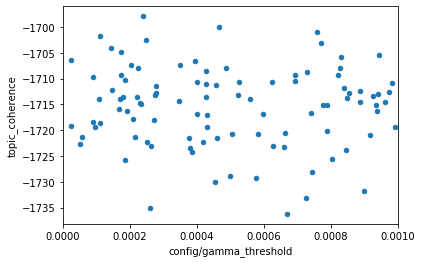

In [39]:
df_analysis_hiper.plot.scatter(y = "topic_coherence", x = "config/gamma_threshold")
plt.xlim(0, 0.001)

(0, 0.001)

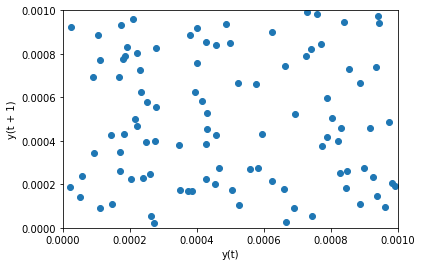

In [41]:
from pandas.plotting import lag_plot

plt.close('all')
plt.figure()
lag_plot(df_analysis_hiper["config/gamma_threshold"])
plt.xlim(0, 0.001)
plt.ylim(0, 0.001)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd3432eefd0>,
      dtype=object)

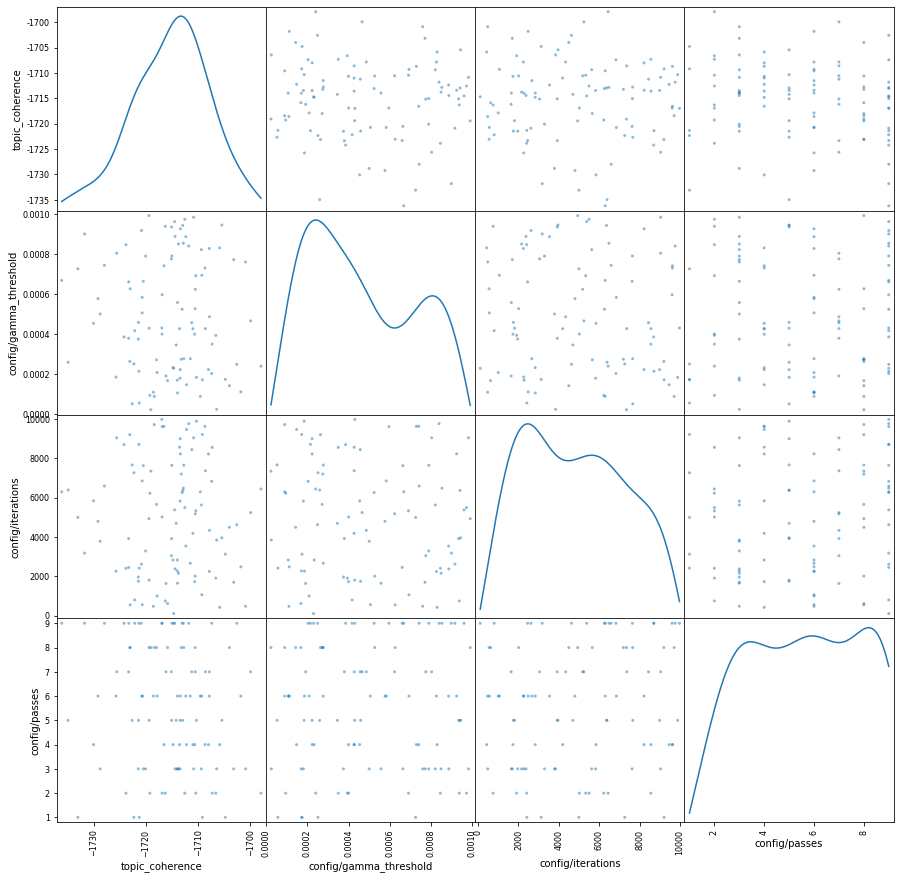

In [50]:
from pandas.plotting import scatter_matrix
# plt.figure(figsize=(18*3, 16*3), dpi= 80*3)
plt.rcParams["figure.figsize"]=15,15
scatter_matrix(df_analysis_hiper[["topic_coherence", "config/gamma_threshold", "config/iterations", "config/passes"]], diagonal = "kde")

In [57]:
best_hiper = analysis.get_best_config(metric = "topic_coherence", mode='max')

In [59]:
# best_hiper_trial = analysis.get_best_trial(metric = "topic_coherence", mode='max')

## Topicos

In [72]:
search_space_topics = {
    **best_hiper,
    "num_topics": tune.sample_from(lambda spec: np.random.randint(10,150)) 
}

In [73]:
reporter = tune.JupyterNotebookReporter(True, max_progress_rows=20, max_error_rows=20, max_report_frequency=5)

In [74]:
# %%time
# analysis = tune.run(search_best_AuthorTopicModel, config=search_space, num_samples=50, progress_reporter=reporter)

Trial name,status,loc,num_topics,iter,total time (s)
search_best_AuthorTopicModel_00000,TERMINATED,,88,0,111.991
search_best_AuthorTopicModel_00001,TERMINATED,,45,0,101.85
search_best_AuthorTopicModel_00002,TERMINATED,,72,0,109.825
search_best_AuthorTopicModel_00003,TERMINATED,,15,0,99.7673
search_best_AuthorTopicModel_00004,TERMINATED,,139,0,123.606
search_best_AuthorTopicModel_00005,TERMINATED,,76,0,106.884
search_best_AuthorTopicModel_00006,TERMINATED,,20,0,99.0309
search_best_AuthorTopicModel_00007,TERMINATED,,109,0,115.294
search_best_AuthorTopicModel_00008,TERMINATED,,130,0,125.495
search_best_AuthorTopicModel_00009,TERMINATED,,130,0,131.843


CPU times: user 42.5 s, sys: 3.39 s, total: 45.9 s
Wall time: 12min 25s


In [75]:
# df_analysis_topic = analysis.dataframe()

In [76]:
# with open("pickles/topic_search.pickle", "wb") as f:
#     pickle.dump(df_analysis_topic , f)

In [78]:
with open("pickles/topic_search.pickle", "rb") as f:
    df_analysis_topic = pickle.load(f)

In [80]:
df_analysis_topic.columns

Index(['topic_coherence', 'trial_id', 'training_iteration', 'time_this_iter_s',
       'done', 'timesteps_total', 'episodes_total', 'experiment_id', 'date',
       'timestamp', 'time_total_s', 'pid', 'hostname', 'node_ip',
       'time_since_restore', 'timesteps_since_restore',
       'iterations_since_restore', 'experiment_tag', 'config/gamma_threshold',
       'config/iterations', 'config/num_topics', 'config/passes', 'logdir'],
      dtype='object')

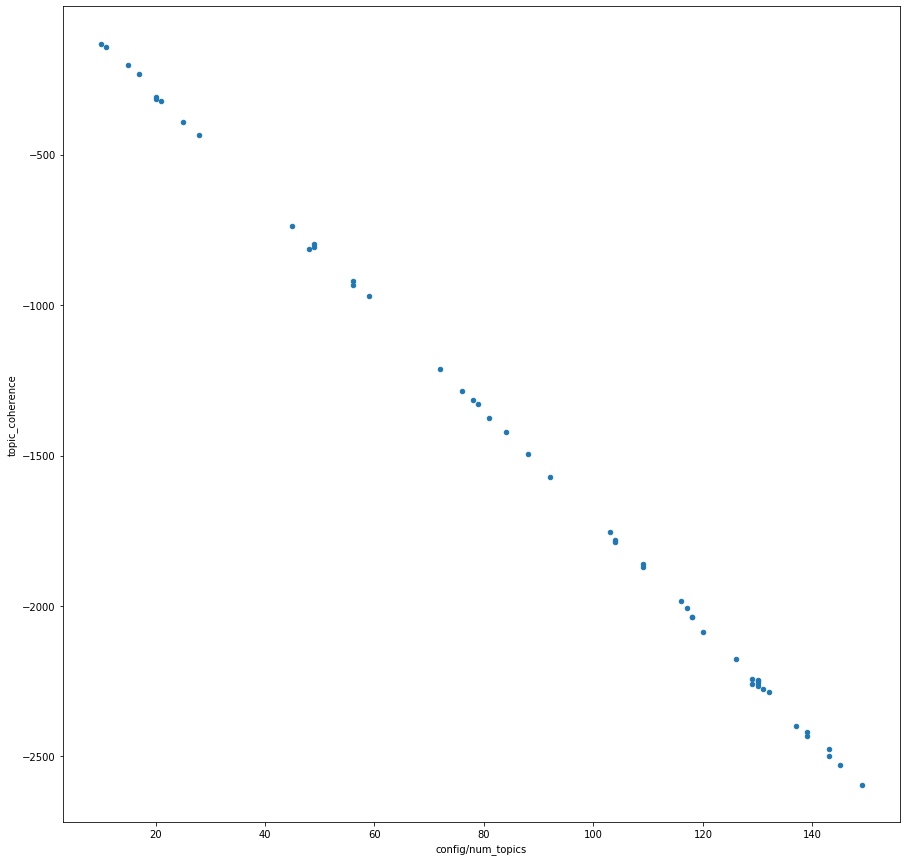

In [84]:
df_analysis_topic.plot.scatter(x="config/num_topics", y = "topic_coherence")